In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from decimal import Decimal
import datetime as dt
import matplotlib.ticker as mtick


# Study data files
cleaned_data_path = "Data/data_cleaning.csv"
stacked_data_path = "Data/data_cleaning_stacked.csv"

# Read the mouse data and the study results
movie_clean = pd.read_csv(cleaned_data_path, index_col=0)
movie_stacked = pd.read_csv(stacked_data_path, index_col=0)

pd.options.display.float_format = '{:,.2f}'.format

In [2]:
# Bin data by decade
decade_bins = [1919, 1929, 1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009, 2019]
decade_names = ['1920-1929', '1930-1939', '1940-1949', '1950-1959', '1960-1969', '1970-1979', '1980-1989', '1990-1999', '2000-2009', '2010-2019']

### Stacked Data Analysis

In [3]:
# Remove leading space in genre
movie_stacked['Genre'] = movie_stacked['Genre'].str.lstrip()

# Display the data table for stacked data
movie_stacked.head()

,IMDB ID,Title,Year,Date Published,Genre,Duration,Country,Language,Director,Writer,Production Company,Actors,Avg Rating,# of Ratings,Lifetime_Gross,Lifetime Gross - Adjusted ($)
0,tt0012190,The Four Horsemen of the Apocalypse,1921,1923-01-08,Drama,150,USA,None,Rex Ingram,"Vicente Blasco Ibáñez, June Mathis",Metro Pictures Corporation,"Pomeroy Cannon, Josef Swickard, Bridgetta Clar...",7.20,2935,"$9,183,673.00","$128,831,540.56"
1,tt0012190,The Four Horsemen of the Apocalypse,1921,1923-01-08,Romance,150,USA,None,Rex Ingram,"Vicente Blasco Ibáñez, June Mathis",Metro Pictures Corporation,"Pomeroy Cannon, Josef Swickard, Bridgetta Clar...",7.20,2935,"$9,183,673.00","$128,831,540.56"
2,tt0012190,The Four Horsemen of the Apocalypse,1921,1923-01-08,War,150,USA,None,Rex Ingram,"Vicente Blasco Ibáñez, June Mathis",Metro Pictures Corporation,"Pomeroy Cannon, Josef Swickard, Bridgetta Clar...",7.20,2935,"$9,183,673.00","$128,831,540.56"
3,tt0017136,Metropolis,1927,1927-02-06,Drama,153,Germany,German,Fritz Lang,"Thea von Harbou, Thea von Harbou",Universum Film (UFA),"Alfred Abel, Gustav Fröhlich, Rudolf Klein-Rog...",8.30,148396,"$1,236,166.00","$17,839,651.48"
4,tt0017136,Metropolis,1927,1927-02-06,Sci-Fi,153,Germany,German,Fritz Lang,"Thea von Harbou, Thea von Harbou",Universum Film (UFA),"Alfred Abel, Gustav Fröhlich, Rudolf Klein-Rog...",8.30,148396,"$1,236,166.00","$17,839,651.48"


In [4]:
# Cut stacked data by decade
movie_stacked["Decade"] = pd.cut(movie_stacked["Year"], decade_bins, labels=decade_names, include_lowest=True)
movie_stacked.head()

# Output file to csv
movie_stacked.to_csv(r'output\movie_stacked.csv', index=False)

In [5]:
# Group stacked data by decade and count how many records
stacked_decade = movie_stacked.groupby('Decade')
stacked_decade.count()


,IMDB ID,Title,Year,Date Published,Genre,Duration,Country,Language,Director,Writer,Production Company,Actors,Avg Rating,# of Ratings,Lifetime_Gross,Lifetime Gross - Adjusted ($)
Decade,,,,,,,,,,,,,,,,
1920-1929,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
1930-1939,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17
1940-1949,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26
1950-1959,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54
1960-1969,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82
1970-1979,572,572,572,572,572,572,572,572,572,572,572,572,572,572,572,572
1980-1989,3108,3108,3108,3108,3108,3108,3108,3108,3108,3108,3085,3108,3108,3108,3108,3108
1990-1999,4374,4374,4374,4374,4374,4374,4374,4371,4374,4372,4363,4374,4374,4374,4374,4374
2000-2009,5459,5459,5459,5459,5459,5459,5459,5447,5457,5449,5402,5457,5459,5459,5459,5459


In [6]:
# Create a variable for each decade with more than 500 records
decade_70 = (movie_stacked[movie_stacked['Decade'] == '1970-1979']).reset_index(drop=True)
decade_80 = (movie_stacked[movie_stacked['Decade'] == '1980-1989']).reset_index(drop=True)
decade_90 = (movie_stacked[movie_stacked['Decade'] == '1990-1999']).reset_index(drop=True)
decade_00 = (movie_stacked[movie_stacked['Decade'] == '2000-2009']).reset_index(drop=True)
decade_10 = (movie_stacked[movie_stacked['Decade'] == '2010-2019']).reset_index(drop=True)

## Create DataFrame and Bar Chart for Each Decade

### 1970's

In [7]:
# Create DataFrame for each decade
# stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots
decade_70_groupby = decade_70.groupby('Genre').count()['Decade'].sort_values(ascending=False)
decade_70_df = pd.DataFrame(decade_70_groupby)
decade_70_df['%'] = ((decade_70_df['Decade'] / decade_70_df['Decade'].sum())*100).round(1).astype(float)


decade_70_df.reset_index()

,Genre,Decade,%
0,Drama,137,24.00
1,Comedy,87,15.20
2,Action,41,7.20
3,Romance,40,7.00
4,Adventure,39,6.80
5,Crime,38,6.60
6,Thriller,38,6.60
7,Mystery,21,3.70
8,Sci-Fi,19,3.30
9,Sport,17,3.00


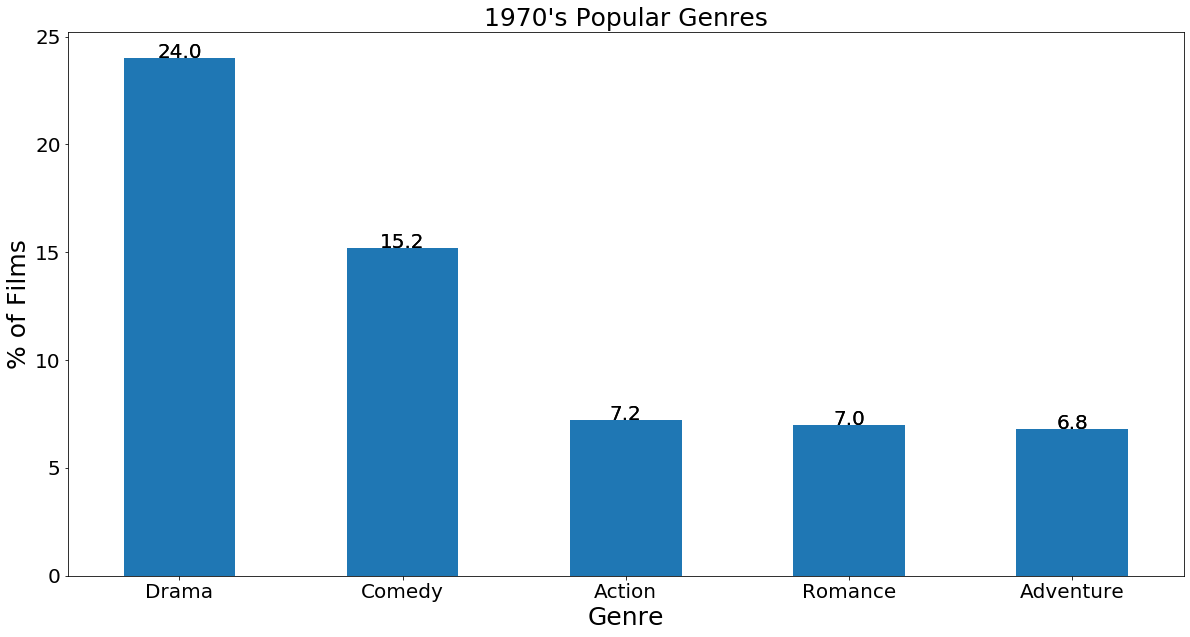

In [8]:
# Plot bar chart
ax = decade_70_df.iloc[0:5].plot(y='%', kind="bar", figsize=(20,10), rot=0, legend=False, fontsize = 20)

# Create and format value labels
for col in decade_70_df.columns:
    for id, val in enumerate(decade_70_df['%'].iloc[0:5]):
        ax.text(id, val, float(val), fontsize=20, ha='center', va='baseline', color = 'black')

# Format chart
plt.title("1970's Popular Genres", fontsize=25)
plt.xlabel("Genre", fontsize=25)
plt.ylabel("% of Films", fontsize=25)

# Output image
plt.savefig("images/1970_Popular_Genres")

# Show Chart
plt.show()

### 1980's

In [9]:
# Create DataFrame for each decade
# stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots
decade_80_groupby = decade_80.groupby('Genre').count()['Decade'].sort_values(ascending=False)
decade_80_df = pd.DataFrame(decade_80_groupby)
decade_80_df['%'] = ((decade_80_df['Decade'] / decade_80_df['Decade'].sum())*100).round(1).astype(float)


decade_80_df.reset_index()

,Genre,Decade,%
0,Drama,654,21.00
1,Comedy,576,18.50
2,Action,274,8.80
3,Crime,253,8.10
4,Romance,245,7.90
5,Adventure,178,5.70
6,Thriller,174,5.60
7,Horror,146,4.70
8,Fantasy,99,3.20
9,Mystery,90,2.90


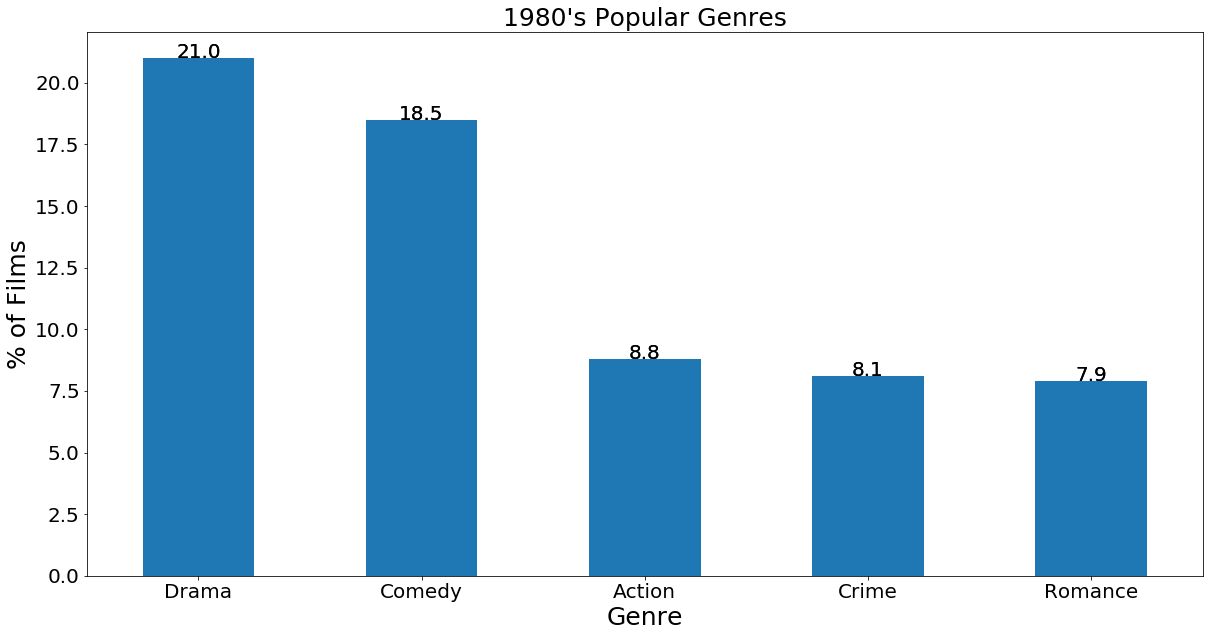

In [10]:
# Plot bar chart
ax = decade_80_df.iloc[0:5].plot(y='%', kind="bar", figsize=(20,10), rot=0, legend=False, fontsize = 20)

# Create and format value labels
for col in decade_80_df.columns:
    for id, val in enumerate(decade_80_df['%'].iloc[0:5]):
        ax.text(id, val, float(val), fontsize=20, ha='center', va='baseline', color = 'black')

# Format chart
plt.title("1980's Popular Genres", fontsize=25)
plt.xlabel("Genre", fontsize=25)
plt.ylabel("% of Films", fontsize=25)

# Output image
plt.savefig("images/1980_Popular_Genres")

# Show Chart
plt.show()

### 1990's

In [11]:
# Create DataFrame for each decade
# stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots
decade_90_groupby = decade_90.groupby('Genre').count()['Decade'].sort_values(ascending=False)
decade_90_df = pd.DataFrame(decade_90_groupby)
decade_90_df['%'] = ((decade_90_df['Decade'] / decade_90_df['Decade'].sum())*100).round(1).astype(float)


decade_90_df.reset_index()

,Genre,Decade,%
0,Drama,1043,23.80
1,Comedy,832,19.00
2,Romance,385,8.80
3,Crime,383,8.80
4,Action,340,7.80
5,Thriller,262,6.00
6,Adventure,223,5.10
7,Family,144,3.30
8,Mystery,119,2.70
9,Horror,113,2.60


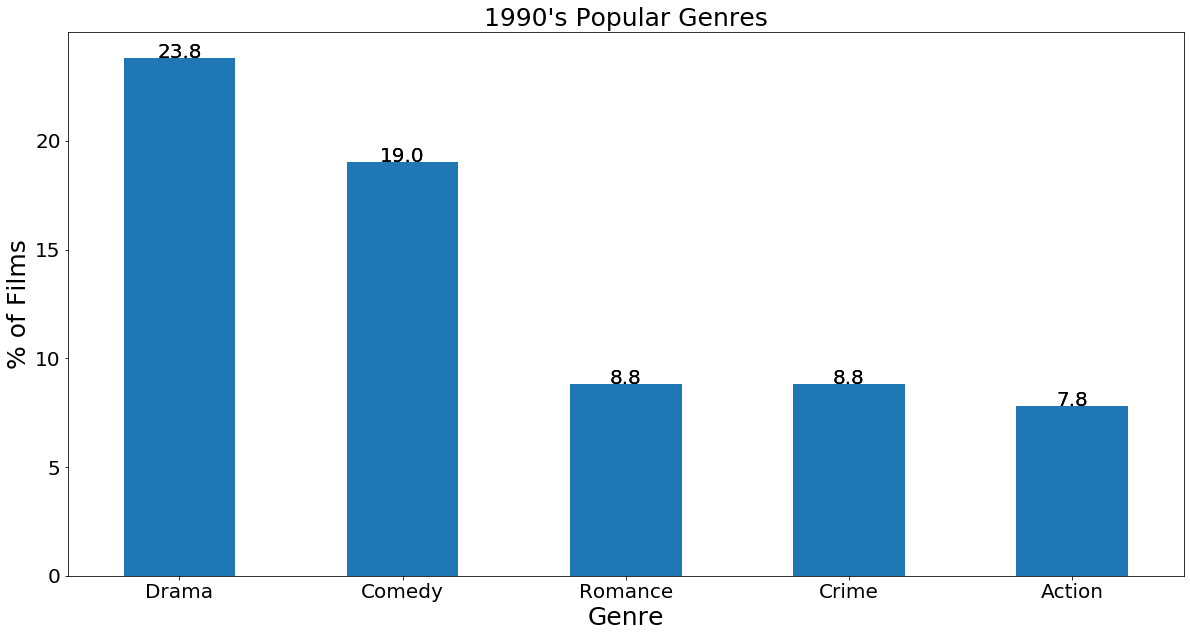

In [12]:
# Plot bar chart
ax = decade_90_df.iloc[0:5].plot(y='%', kind="bar", figsize=(20,10), rot=0, legend=False, fontsize = 20)

# Create and format value labels
for col in decade_90_df.columns:
    for id, val in enumerate(decade_90_df['%'].iloc[0:5]):
        ax.text(id, val, float(val), fontsize=20, ha='center', va='baseline', color = 'black')

# Format chart
plt.title("1990's Popular Genres", fontsize=25)
plt.xlabel("Genre", fontsize=25)
plt.ylabel("% of Films", fontsize=25)

# Output image
plt.savefig("images/1990_Popular_Genres")

# Show Chart
plt.show()

### 2000's

In [13]:
# Create DataFrame for each decade
# stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots
decade_00_groupby = decade_00.groupby('Genre').count()['Decade'].sort_values(ascending=False)
decade_00_df = pd.DataFrame(decade_00_groupby)
decade_00_df['%'] = ((decade_00_df['Decade'] / decade_00_df['Decade'].sum())*100).round(1).astype(float)


decade_00_df.reset_index()

,Genre,Decade,%
0,Drama,1230,22.50
1,Comedy,972,17.80
2,Romance,518,9.50
3,Action,439,8.00
4,Crime,416,7.60
5,Adventure,326,6.00
6,Thriller,284,5.20
7,Mystery,196,3.60
8,Family,163,3.00
9,Horror,159,2.90


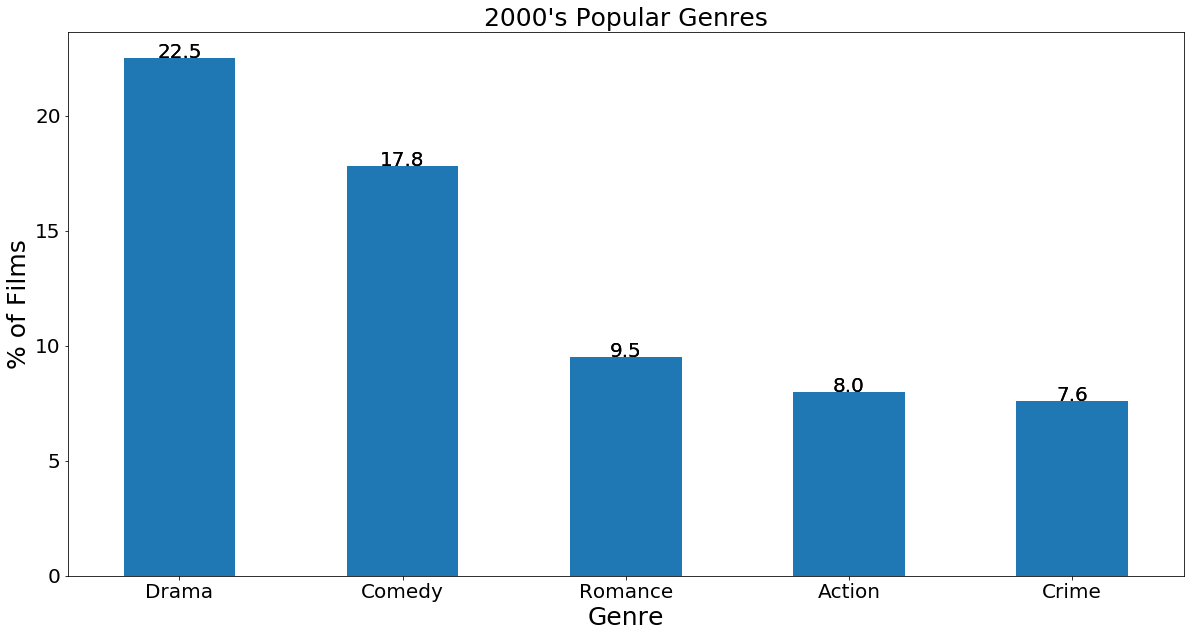

In [14]:
# Plot bar chart
ax = decade_00_df.iloc[0:5].plot(y='%', kind="bar", figsize=(20,10), rot=0, legend=False, fontsize = 20)

# Create and format value labels
for col in decade_00_df.columns:
    for id, val in enumerate(decade_00_df['%'].iloc[0:5]):
        ax.text(id, val, float(val), fontsize=20, ha='center', va='baseline', color = 'black')

# Format chart
plt.title("2000's Popular Genres", fontsize=25)
plt.xlabel("Genre", fontsize=25)
plt.ylabel("% of Films", fontsize=25)

# Output image
plt.savefig("images/2000_Popular_Genres")

# Show Chart
plt.show()

### 2010's

In [15]:
# Create DataFrame for each decade
# stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots
decade_10_groupby = decade_10.groupby('Genre').count()['Decade'].sort_values(ascending=False)
decade_10_df = pd.DataFrame(decade_10_groupby)
decade_10_df['%'] = ((decade_10_df['Decade'] / decade_10_df['Decade'].sum())*100).round(1).astype(float)


decade_10_df.reset_index()

,Genre,Decade,%
0,Drama,1178,23.30
1,Comedy,803,15.90
2,Action,521,10.30
3,Romance,350,6.90
4,Thriller,344,6.80
5,Adventure,326,6.40
6,Crime,296,5.90
7,Horror,200,4.00
8,Biography,193,3.80
9,Mystery,155,3.10


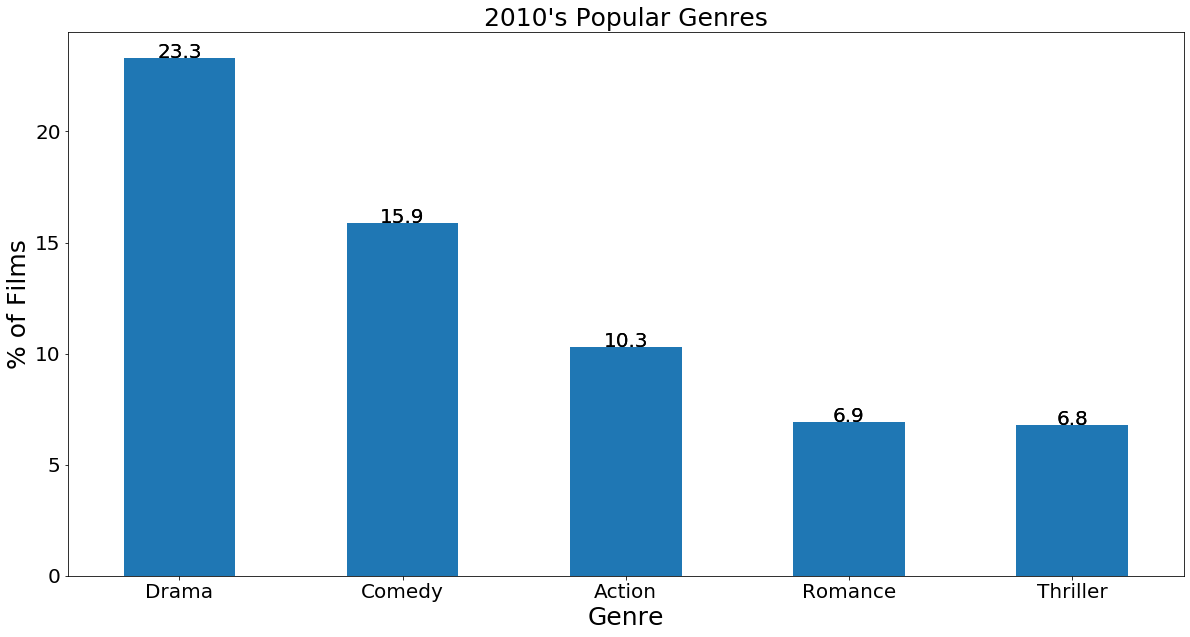

In [16]:
# Plot bar chart
ax = decade_10_df.iloc[0:5].plot(y='%', kind="bar", figsize=(20,10), rot=0, legend=False, fontsize = 20)

# Create and format value labels
for col in decade_10_df.columns:
    for id, val in enumerate(decade_10_df['%'].iloc[0:5]):
        ax.text(id, val, float(val), fontsize=20, ha='center', va='baseline', color = 'black')

# Format chart
plt.title("2010's Popular Genres", fontsize=25)
plt.xlabel("Genre", fontsize=25)
plt.ylabel("% of Films", fontsize=25)

# Output image
plt.savefig("images/2010_Popular_Genres")

# Show Chart
plt.show()

### Genre % Table

In [57]:
percentage_frames = [decade_70_df['%'], decade_80_df['%'], decade_90_df['%'], decade_00_df['%'], decade_10_df['%']]

percentage_combined = pd.concat(percentage_frames, axis=1)
percentage_combined['Total %'] = percentage_combined.mean(numeric_only=True, axis=1)                        
percentage_combined[['%']]
percentage_combined.sort_values("Total %", ascending=False)


,%,%,%,%,%,Total %
Drama,24.00,21.00,23.80,22.50,23.30,22.92
Comedy,15.20,18.50,19.00,17.80,15.90,17.28
Action,7.20,8.80,7.80,8.00,10.30,8.42
Romance,7.00,7.90,8.80,9.50,6.90,8.02
Crime,6.60,8.10,8.80,7.60,5.90,7.40
Thriller,6.60,5.60,6.00,5.20,6.80,6.04
Adventure,6.80,5.70,5.10,6.00,6.40,6.00
Horror,2.30,4.70,2.60,2.90,4.00,3.30
Mystery,3.70,2.90,2.70,3.60,3.10,3.20
Family,2.80,1.70,3.30,3.00,2.00,2.56


## Rating by Genre

In [17]:
# Create a variable for each decade with more than 500 records
rating_70 = (movie_stacked[movie_stacked['Decade'] == '1970-1979']).reset_index(drop=True)
rating_80 = (movie_stacked[movie_stacked['Decade'] == '1980-1989']).reset_index(drop=True)
rating_90 = (movie_stacked[movie_stacked['Decade'] == '1990-1999']).reset_index(drop=True)
rating_00 = (movie_stacked[movie_stacked['Decade'] == '2000-2009']).reset_index(drop=True)
rating_10 = (movie_stacked[movie_stacked['Decade'] == '2010-2019']).reset_index(drop=True)

### 1970's Rating

In [18]:
rating_70_groupby = rating_70.groupby('Genre').mean()['Avg Rating'].sort_values(ascending=False)
rating_70_df = pd.DataFrame(rating_70_groupby)

rating_70_df.reset_index()

,Genre,Avg Rating
0,Biography,7.59
1,War,7.08
2,Crime,7.07
3,Musical,7.04
4,History,6.96
5,Animation,6.90
6,Music,6.85
7,Western,6.82
8,Mystery,6.81
9,Drama,6.78


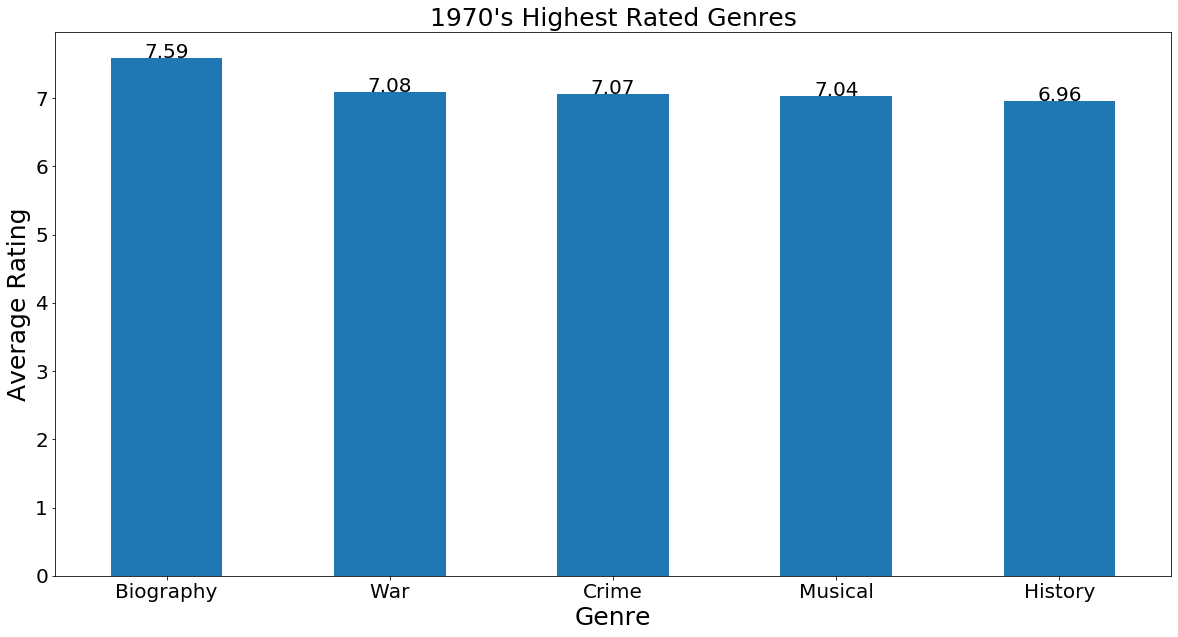

In [19]:
# Plot bar chart
ax = rating_70_df.iloc[0:5].plot(y='Avg Rating', kind="bar", figsize=(20,10), rot=0, legend=False, fontsize = 20)

# Create and format value labels
for col in rating_70_df.columns:
    for id, val in enumerate(rating_70_df['Avg Rating'].iloc[0:5]):
        ax.text(id, val, round(val,2), fontsize=20, ha='center', va='baseline', color = 'black')

# Format chart
plt.title("1970's Highest Rated Genres", fontsize=25)
plt.xlabel("Genre", fontsize=25)
plt.ylabel("Average Rating", fontsize=25)


# Output image
plt.savefig("images/1970_Popular_Rating")

# Show Chart
plt.show()

### 1980's Rating

In [20]:
rating_80_groupby = rating_80.groupby('Genre').mean()['Avg Rating'].sort_values(ascending=False)
rating_80_df = pd.DataFrame(rating_80_groupby)

rating_80_df.reset_index()

,Genre,Avg Rating
0,History,7.11
1,Biography,6.96
2,Animation,6.82
3,War,6.40
4,Drama,6.39
5,Adventure,6.20
6,Family,6.19
7,Crime,6.18
8,Music,6.17
9,Sci-Fi,6.15


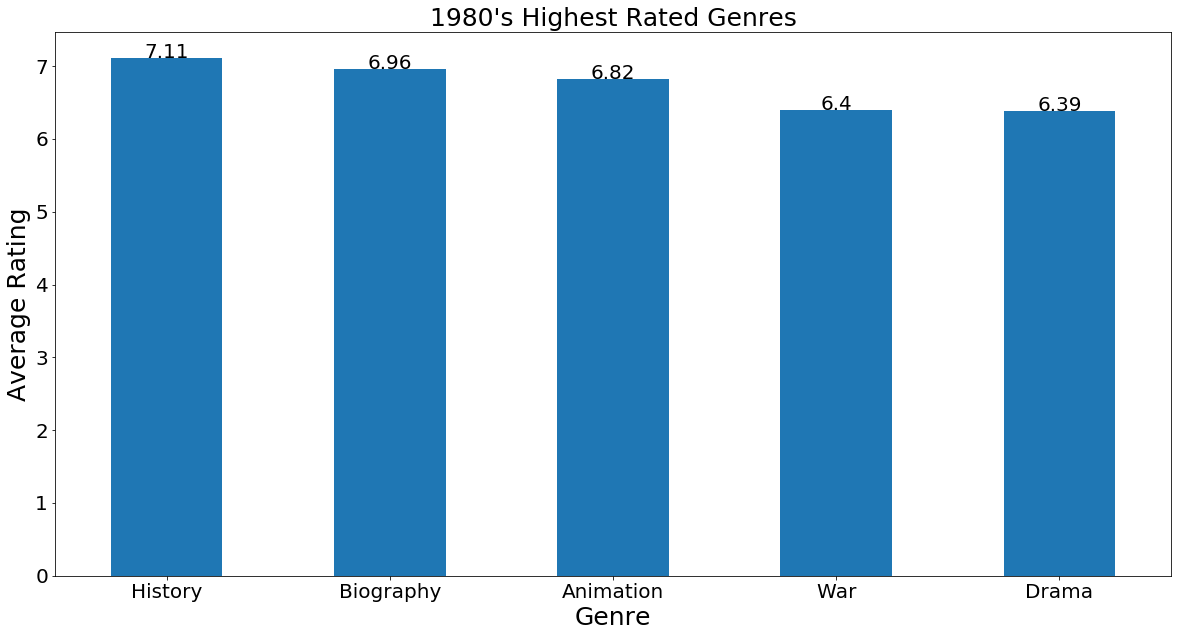

In [21]:
# Plot bar chart
ax = rating_80_df.iloc[0:5].plot(y='Avg Rating', kind="bar", figsize=(20,10), rot=0, legend=False, fontsize = 20)

# Create and format value labels
for col in rating_80_df.columns:
    for id, val in enumerate(rating_80_df['Avg Rating'].iloc[0:5]):
        ax.text(id, val, round(val,2), fontsize=20, ha='center', va='baseline', color = 'black')

# Format chart
plt.title("1980's Highest Rated Genres", fontsize=25)
plt.xlabel("Genre", fontsize=25)
plt.ylabel("Average Rating", fontsize=25)


# Output image
plt.savefig("images/1980_Popular_Rating")

# Show Chart
plt.show()

### 1990's Rating

In [22]:
rating_90_groupby = rating_90.groupby('Genre').mean()['Avg Rating'].sort_values(ascending=False)
rating_90_df = pd.DataFrame(rating_90_groupby)

rating_90_df.reset_index()

,Genre,Avg Rating
0,History,7.05
1,Biography,6.97
2,Animation,6.76
3,War,6.54
4,Music,6.52
5,Western,6.50
6,Drama,6.50
7,Mystery,6.36
8,Crime,6.29
9,Romance,6.26


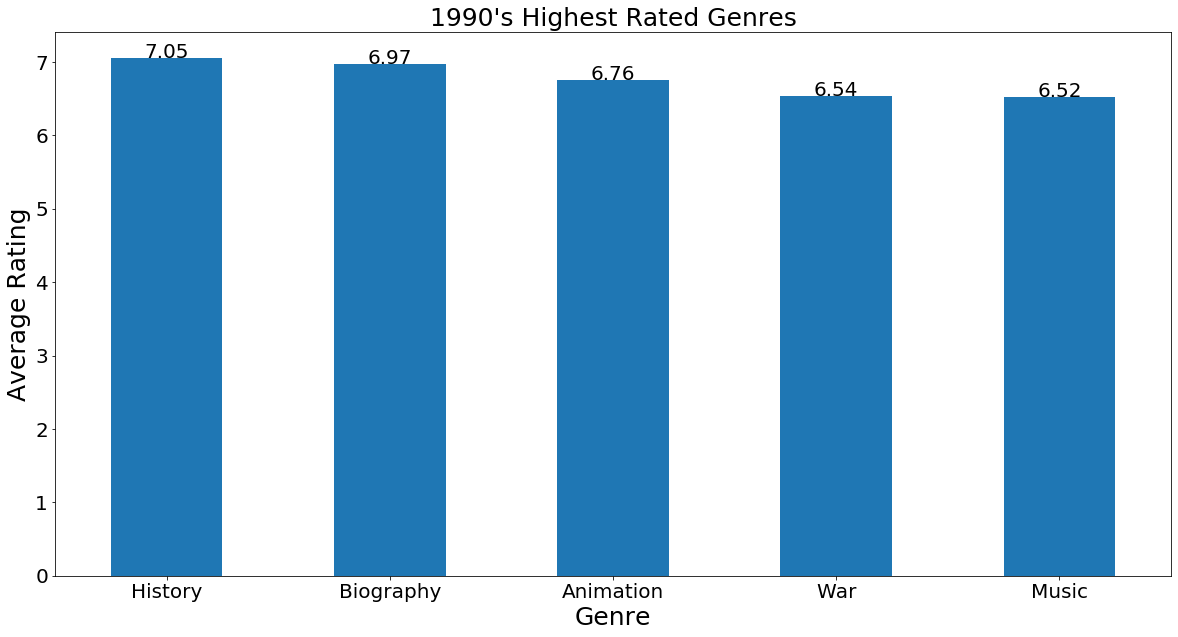

In [23]:
# Plot bar chart
ax = rating_90_df.iloc[0:5].plot(y='Avg Rating', kind="bar", figsize=(20,10), rot=0, legend=False, fontsize = 20)

# Create and format value labels
for col in rating_90_df.columns:
    for id, val in enumerate(rating_90_df['Avg Rating'].iloc[0:5]):
        ax.text(id, val, round(val,2), fontsize=20, ha='center', va='baseline', color = 'black')

# Format chart
plt.title("1990's Highest Rated Genres", fontsize=25)
plt.xlabel("Genre", fontsize=25)
plt.ylabel("Average Rating", fontsize=25)


# Output image
plt.savefig("images/1990_Popular_Rating")

# Show Chart
plt.show()

### 2000's Rating

In [24]:
rating_00_groupby = rating_00.groupby('Genre').mean()['Avg Rating'].sort_values(ascending=False)
rating_00_df = pd.DataFrame(rating_00_groupby)

rating_00_df.reset_index()

,Genre,Avg Rating
0,History,6.99
1,Biography,6.98
2,War,6.73
3,Drama,6.44
4,Animation,6.32
5,Crime,6.21
6,Thriller,6.17
7,Sci-Fi,6.16
8,Mystery,6.15
9,Sport,6.13


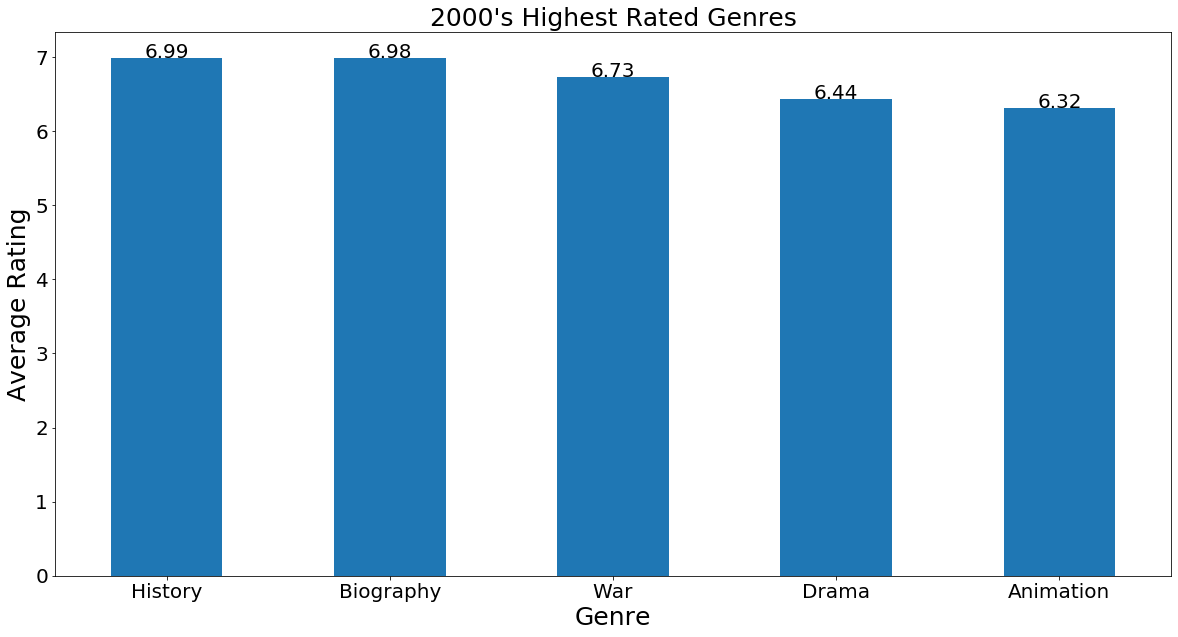

In [25]:
# Plot bar chart
ax = rating_00_df.iloc[0:5].plot(y='Avg Rating', kind="bar", figsize=(20,10), rot=0, legend=False, fontsize = 20)

# Create and format value labels
for col in rating_00_df.columns:
    for id, val in enumerate(rating_00_df['Avg Rating'].iloc[0:5]):
        ax.text(id, val, round(val,2), fontsize=20, ha='center', va='baseline', color = 'black')

# Format chart
plt.title("2000's Highest Rated Genres", fontsize=25)
plt.xlabel("Genre", fontsize=25)
plt.ylabel("Average Rating", fontsize=25)


# Output image
plt.savefig("images/2000_Popular_Rating")

# Show Chart
plt.show()

### 2010's Rating

In [26]:
rating_10_groupby = rating_10.groupby('Genre').mean()['Avg Rating'].sort_values(ascending=False)
rating_10_df = pd.DataFrame(rating_10_groupby)

rating_10_df.reset_index()

,Genre,Avg Rating
0,Biography,6.89
1,History,6.65
2,Sport,6.57
3,Western,6.51
4,Animation,6.51
5,Adventure,6.38
6,Drama,6.34
7,Music,6.28
8,Sci-Fi,6.26
9,Crime,6.18


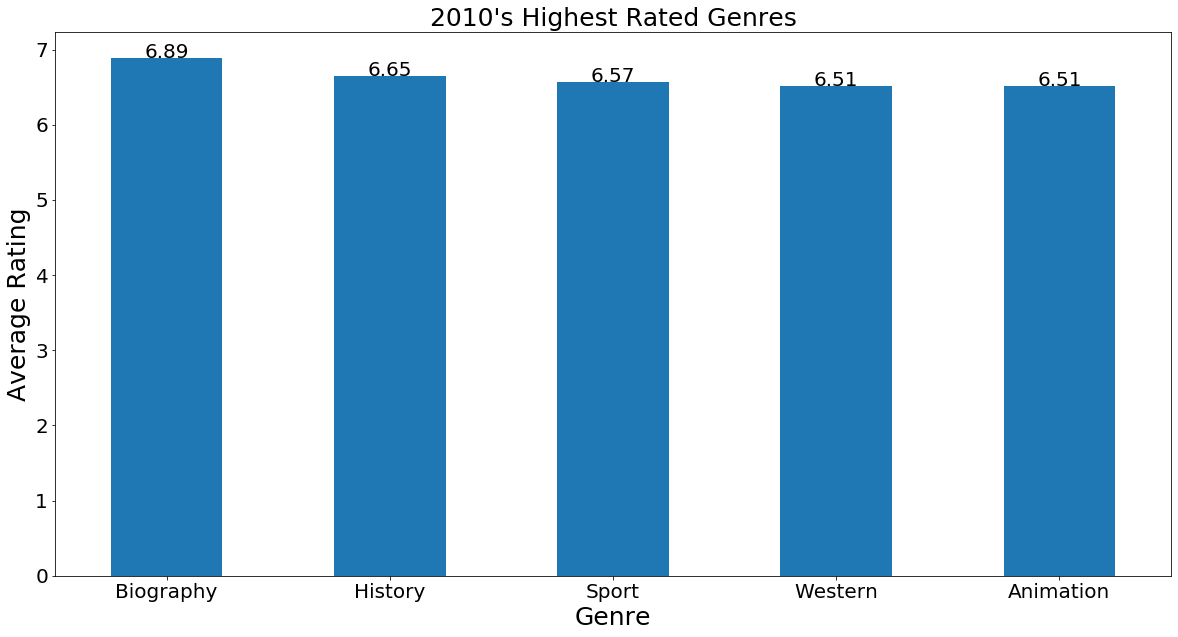

In [27]:
# Plot bar chart
ax = rating_10_df.iloc[0:5].plot(y='Avg Rating', kind="bar", figsize=(20,10), rot=0, legend=False, fontsize = 20)

# Create and format value labels
for col in rating_10_df.columns:
    for id, val in enumerate(rating_10_df['Avg Rating'].iloc[0:5]):
        ax.text(id, val, round(val,2), fontsize=20, ha='center', va='baseline', color = 'black')

# Format chart
plt.title("2010's Highest Rated Genres", fontsize=25)
plt.xlabel("Genre", fontsize=25)
plt.ylabel("Average Rating", fontsize=25)


# Output image
plt.savefig("images/2010_Popular_Rating")

# Show Chart
plt.show()

### Genre Percentage Table

## Rating by Genre

### 1970's Rating by Genre

In [28]:
decade_70_combined = pd.concat([decade_70_df, rating_70_df], axis=1)
decade_70_combined[['%', "Avg Rating"]]
decade_70_combined

,Decade,%,Avg Rating
Drama,137,24.00,6.78
Comedy,87,15.20,6.51
Action,41,7.20,6.46
Romance,40,7.00,6.39
Adventure,39,6.80,6.52
Crime,38,6.60,7.07
Thriller,38,6.60,6.76
Mystery,21,3.70,6.81
Sci-Fi,19,3.30,6.35
Sport,17,3.00,5.99


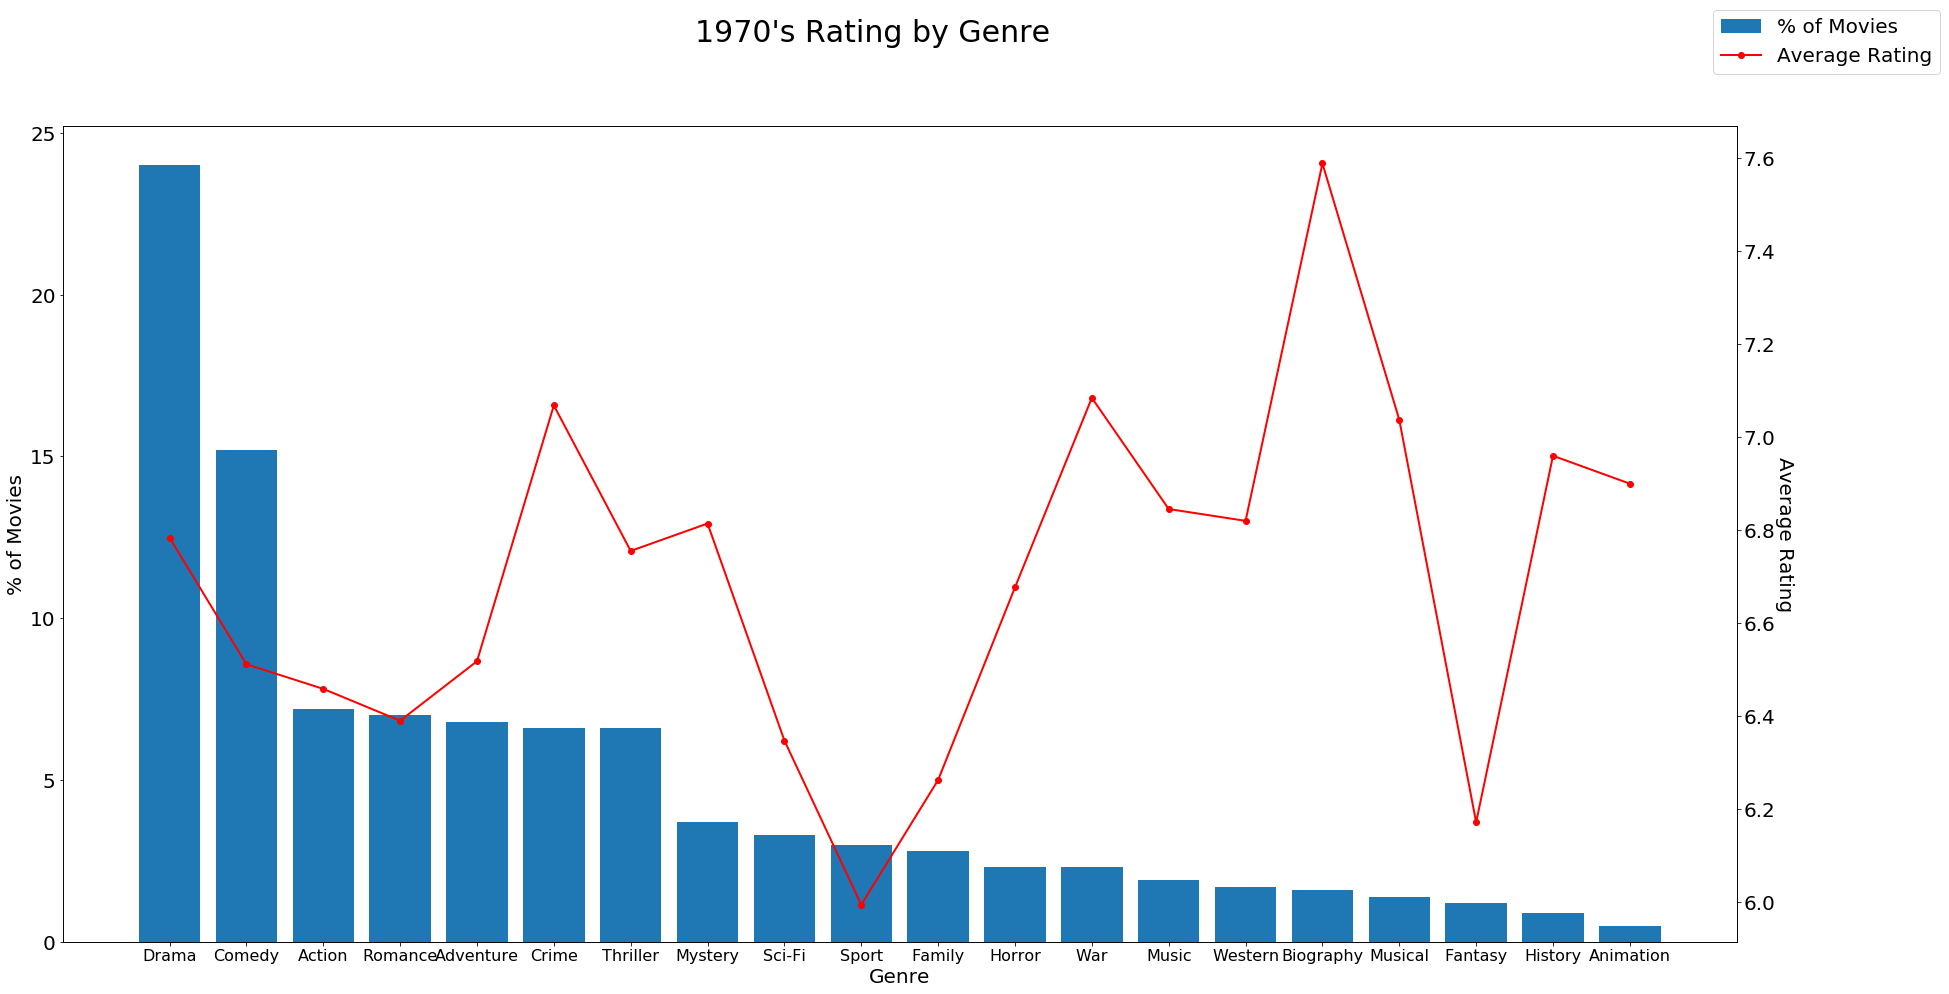

In [29]:
# Plot the average rating over the most popular genres
fig, ax = plt.subplots(figsize=(30,15))
ax2 = ax.twinx()
ax.bar(decade_70_combined.index, decade_70_combined["%"], label='% of Movies')
ax2.plot(decade_70_combined.index, decade_70_combined["Avg Rating"], color='red', label='Average Rating', marker='o', linewidth=2)

# Format chart
fig.legend(loc='upper right', fontsize=20)
fig.suptitle("1970's Rating by Genre", fontsize=30)
ax.set_xticklabels(decade_70_combined.index)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=20)
ax2.yaxis.set_tick_params(labelsize=20)
ax.set_xlabel('Genre', fontsize=20)
ax.set_ylabel('% of Movies', fontsize=20)
ax2.set_ylabel('Average Rating', fontsize=20, rotation=270, va='baseline')

# Output image
plt.savefig("images/1970_Rating_by_Genre")

# Show Chart
plt.show()

### 1980's Rating by Genre

In [30]:
decade_80_combined = pd.concat([decade_80_df, rating_80_df], axis=1)
decade_80_combined[['%', "Avg Rating"]]
decade_80_combined

,Decade,%,Avg Rating
Drama,654,21.00,6.39
Comedy,576,18.50,6.01
Action,274,8.80,5.99
Crime,253,8.10,6.18
Romance,245,7.90,6.15
Adventure,178,5.70,6.20
Thriller,174,5.60,6.06
Horror,146,4.70,5.98
Fantasy,99,3.20,6.05
Mystery,90,2.90,6.08


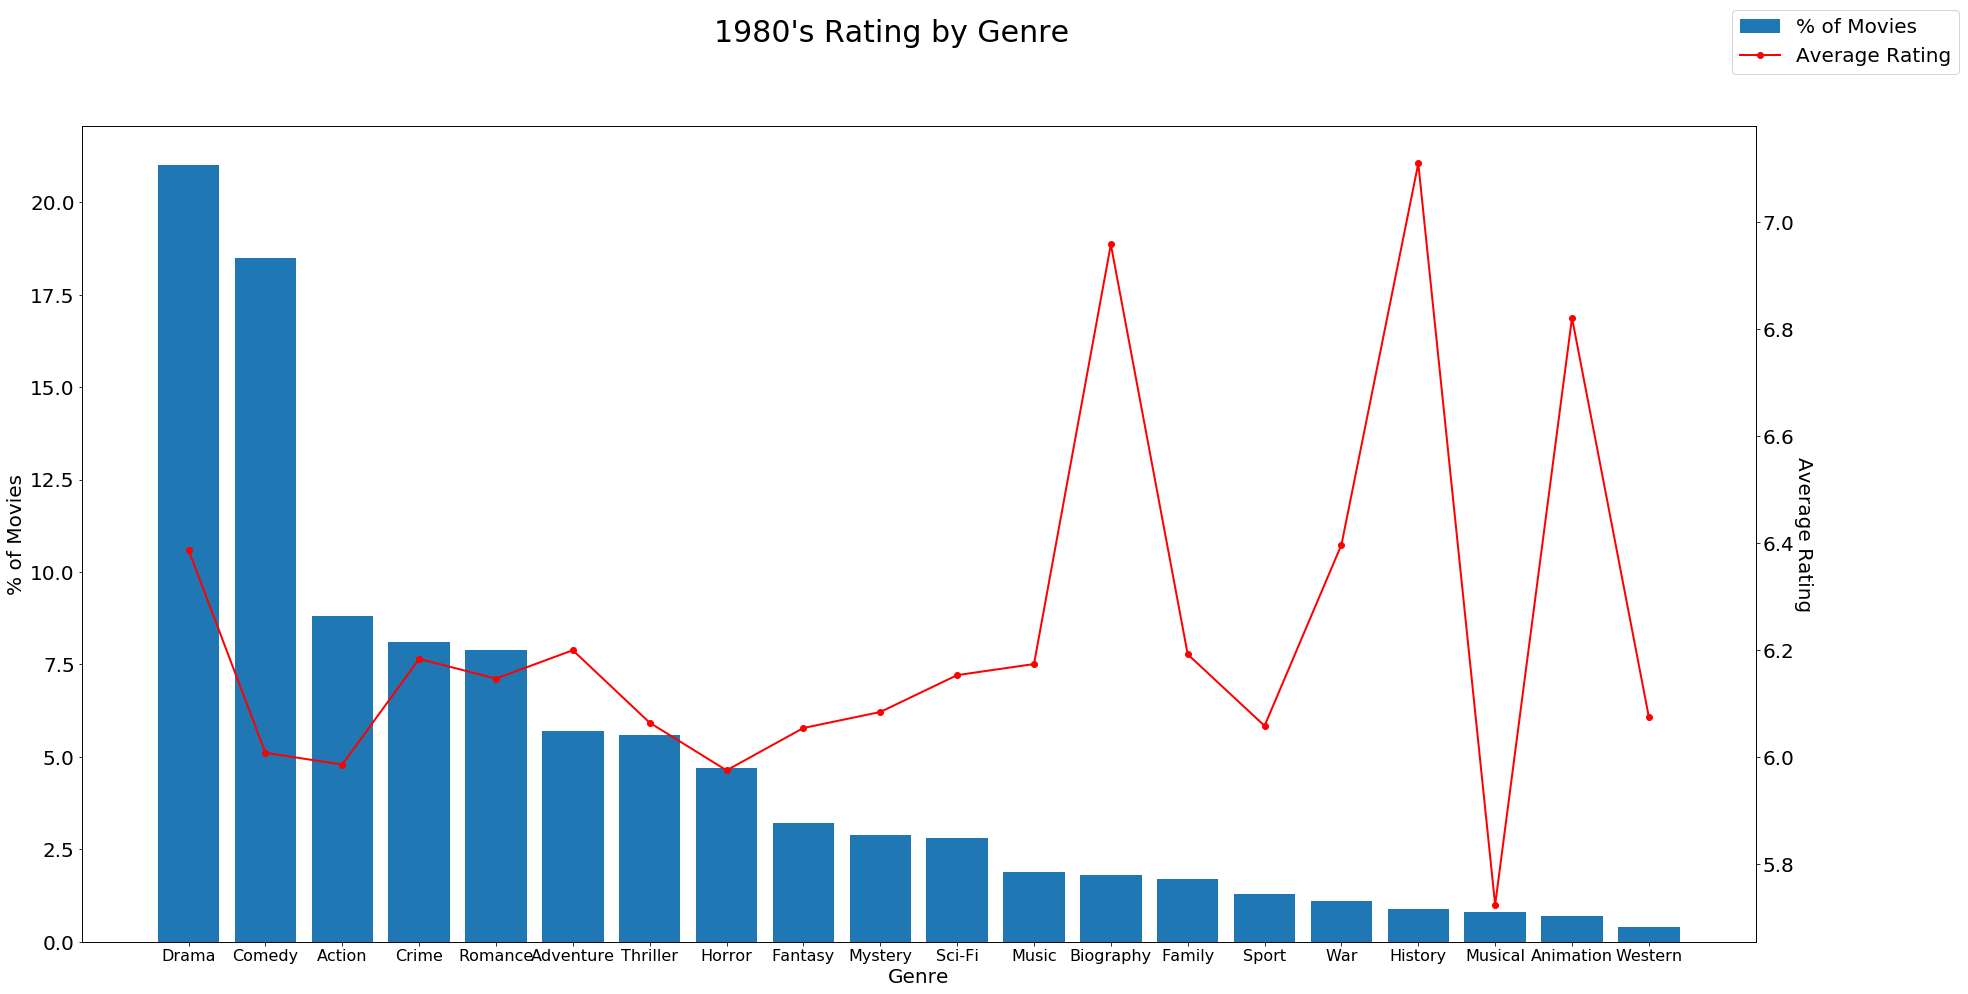

In [31]:
# Plot the average rating over the most popular genres
fig, ax = plt.subplots(figsize=(30,15))
ax2 = ax.twinx()
ax.bar(decade_80_combined.index, decade_80_combined["%"], label='% of Movies')
ax2.plot(decade_80_combined.index, decade_80_combined["Avg Rating"], color='red', label='Average Rating', marker='o', linewidth=2)

# Format chart
fig.legend(loc='upper right', fontsize=20)
fig.suptitle("1980's Rating by Genre", fontsize=30)
ax.set_xticklabels(decade_80_combined.index)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=20)
ax2.yaxis.set_tick_params(labelsize=20)
ax.set_xlabel('Genre', fontsize=20)
ax.set_ylabel('% of Movies', fontsize=20)
ax2.set_ylabel('Average Rating', fontsize=20, rotation=270, va='baseline')

# Output image
plt.savefig("images/1980_Rating_by_Genre")

# Show Chart
plt.show()

### 1990's Rating by Genre

In [32]:
decade_90_combined = pd.concat([decade_90_df, rating_90_df], axis=1)
decade_90_combined[['%', "Avg Rating"]]
decade_90_combined

,Decade,%,Avg Rating
Drama,1043,23.80,6.50
Comedy,832,19.00,6.03
Romance,385,8.80,6.26
Crime,383,8.80,6.29
Action,340,7.80,5.95
Thriller,262,6.00,6.22
Adventure,223,5.10,6.10
Family,144,3.30,5.75
Mystery,119,2.70,6.36
Horror,113,2.60,5.72


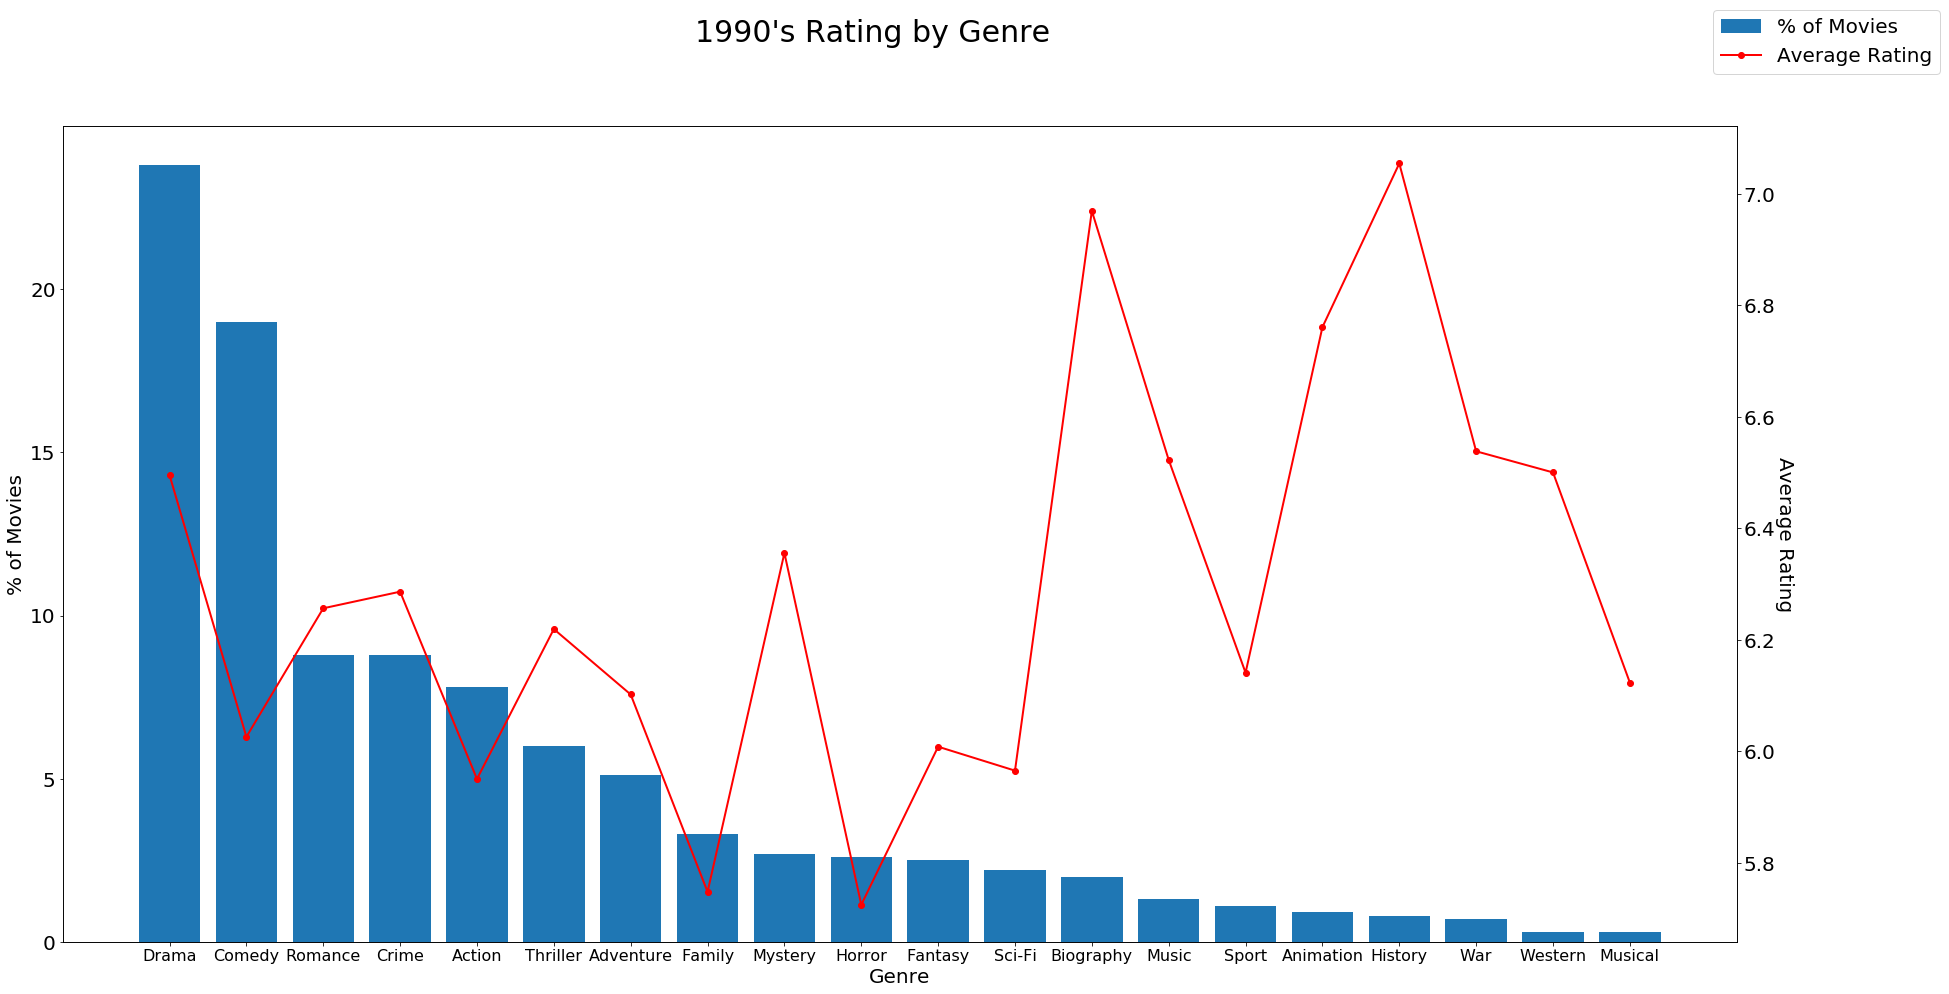

In [33]:
# Plot the average rating over the most popular genres
fig, ax = plt.subplots(figsize=(30,15))
ax2 = ax.twinx()
ax.bar(decade_90_combined.index, decade_90_combined["%"], label='% of Movies')
ax2.plot(decade_90_combined.index, decade_90_combined["Avg Rating"], color='red', label='Average Rating', marker='o', linewidth=2)

# Format chart
fig.legend(loc='upper right', fontsize=20)
fig.suptitle("1990's Rating by Genre", fontsize=30)
ax.set_xticklabels(decade_90_combined.index)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=20)
ax2.yaxis.set_tick_params(labelsize=20)
ax.set_xlabel('Genre', fontsize=20)
ax.set_ylabel('% of Movies', fontsize=20)
ax2.set_ylabel('Average Rating', fontsize=20, rotation=270, va='baseline')

# Output image
plt.savefig("images/1990_Rating_by_Genre")

# Show Chart
plt.show()

### 2000's Rating by Genre

In [34]:
decade_00_combined = pd.concat([decade_00_df, rating_00_df], axis=1)
decade_00_combined[['%', "Avg Rating"]]
decade_00_combined

,Decade,%,Avg Rating
Drama,1230,22.50,6.44
Comedy,972,17.80,5.89
Romance,518,9.50,6.10
Action,439,8.00,5.99
Crime,416,7.60,6.21
Adventure,326,6.00,6.12
Thriller,284,5.20,6.17
Mystery,196,3.60,6.15
Family,163,3.00,5.73
Horror,159,2.90,5.62


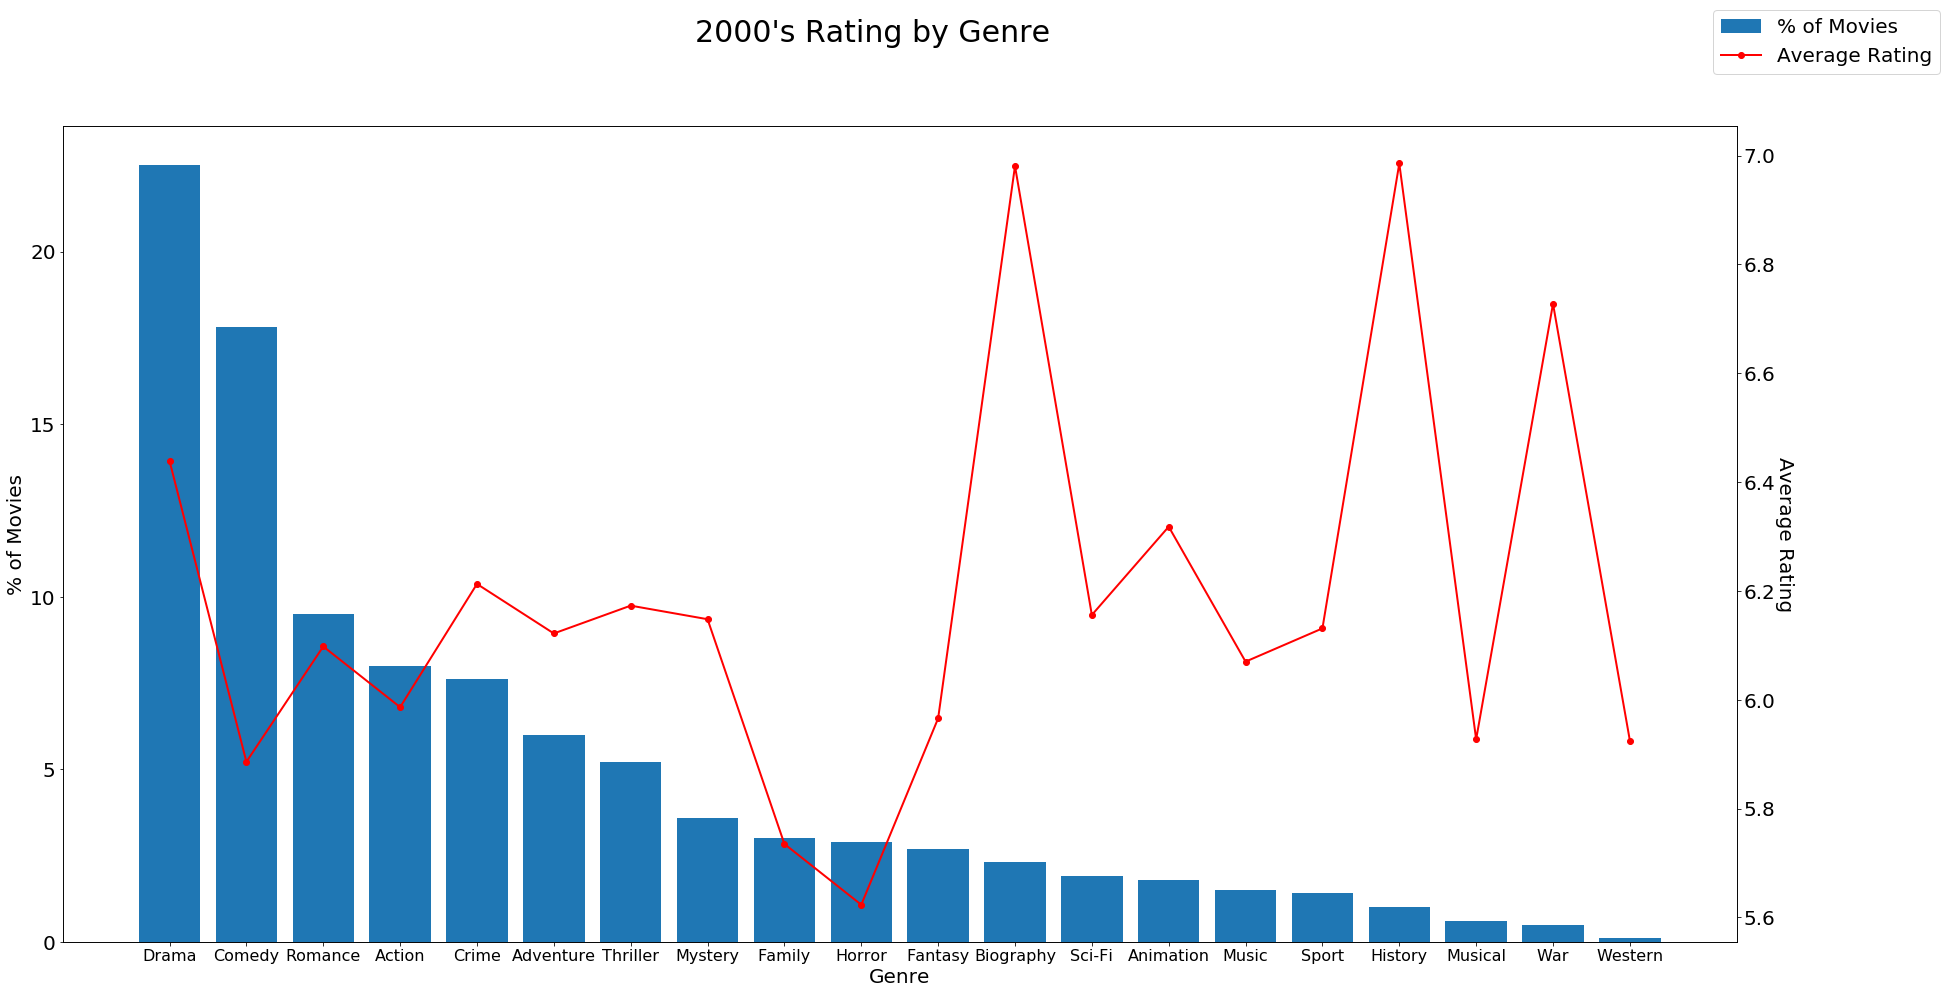

In [35]:
# Plot the average rating over the most popular genres
fig, ax = plt.subplots(figsize=(30,15))
ax2 = ax.twinx()
ax.bar(decade_00_combined.index, decade_00_combined["%"], label='% of Movies')
ax2.plot(decade_00_combined.index, decade_00_combined["Avg Rating"], color='red', label='Average Rating', marker='o', linewidth=2)

# Format chart
fig.legend(loc='upper right', fontsize=20)
fig.suptitle("2000's Rating by Genre", fontsize=30)
ax.set_xticklabels(decade_00_combined.index)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=20)
ax2.yaxis.set_tick_params(labelsize=20)
ax.set_xlabel('Genre', fontsize=20)
ax.set_ylabel('% of Movies', fontsize=20)
ax2.set_ylabel('Average Rating', fontsize=20, rotation=270, va='baseline')

# Output image
plt.savefig("images/2000_Rating_by_Genre")

# Show Chart
plt.show()

### 2010's Ratings by Genre

In [36]:
decade_10_combined = pd.concat([decade_10_df, rating_10_df], axis=1)
decade_10_combined[['%', "Avg Rating"]]
decade_10_combined

,Decade,%,Avg Rating
Drama,1178,23.30,6.34
Comedy,803,15.90,6.00
Action,521,10.30,6.09
Romance,350,6.90,6.13
Thriller,344,6.80,5.88
Adventure,326,6.40,6.38
Crime,296,5.90,6.18
Horror,200,4.00,5.41
Biography,193,3.80,6.89
Mystery,155,3.10,5.99


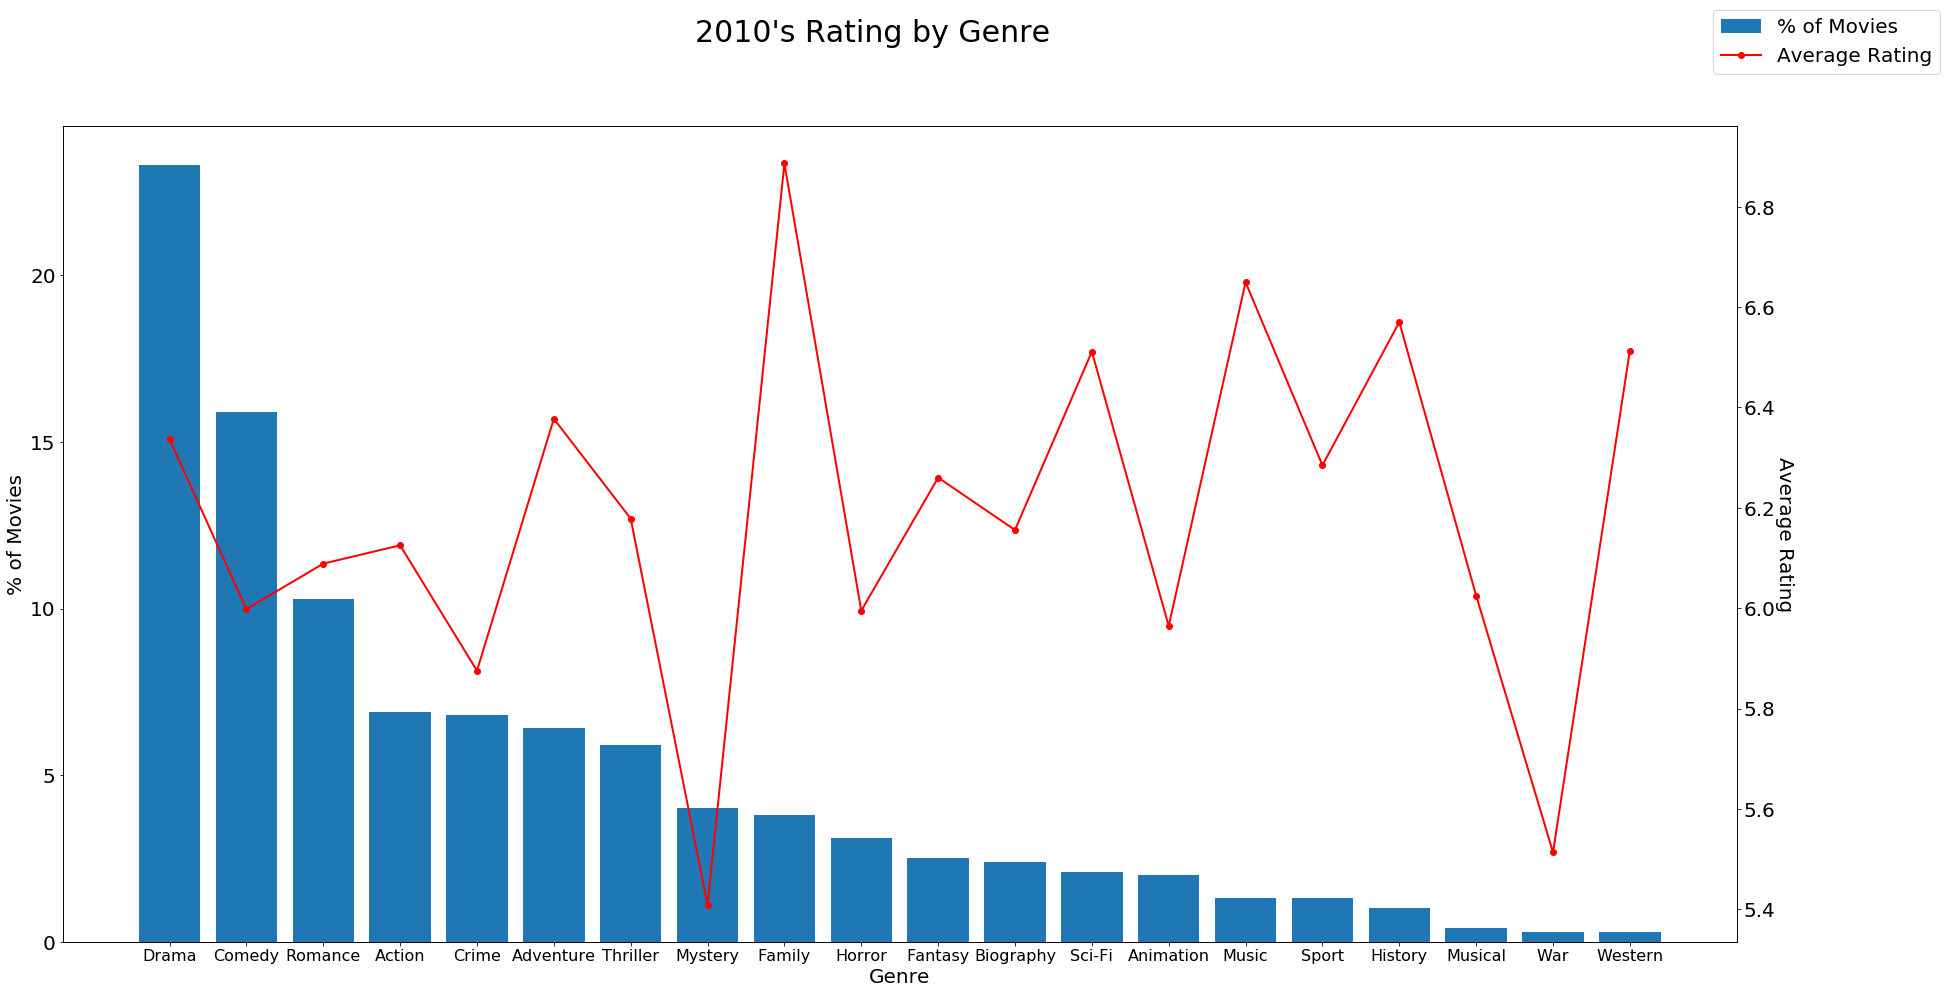

In [37]:
# Plot the average rating over the most popular genres
fig, ax = plt.subplots(figsize=(30,15))
ax2 = ax.twinx()
ax.bar(decade_10_combined.index, decade_10_combined["%"], label='% of Movies')
ax2.plot(decade_10_combined.index, decade_10_combined["Avg Rating"], color='red', label='Average Rating', marker='o', linewidth=2)

# Format chart
fig.legend(loc='upper right', fontsize=20)
fig.suptitle("2010's Rating by Genre", fontsize=30)
ax.set_xticklabels(decade_00_combined.index)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=20)
ax2.yaxis.set_tick_params(labelsize=20)
ax.set_xlabel('Genre', fontsize=20)
ax.set_ylabel('% of Movies', fontsize=20)
ax2.set_ylabel('Average Rating', fontsize=20, rotation=270, va='baseline')

# Output image
plt.savefig("images/2010_Rating_by_Genre")

# Show Chart
plt.show()

### Ratings Table

In [48]:
ratings_frames = [rating_70_df, rating_80_df, rating_90_df, rating_00_df, rating_10_df]

ratings_combined = pd.concat(ratings_frames, axis=1)
ratings_combined['Total Average'] = ratings_combined.mean(numeric_only=True, axis=1)                        
ratings_combined[['Avg Rating']]
ratings_combined.sort_values("Total Average", ascending=False)

,Avg Rating,Avg Rating,Avg Rating,Avg Rating,Avg Rating,Total Average
Biography,7.59,6.96,6.97,6.98,6.89,7.08
History,6.96,7.11,7.05,6.99,6.65,6.95
Animation,6.90,6.82,6.76,6.32,6.51,6.66
War,7.08,6.40,6.54,6.73,6.02,6.55
Drama,6.78,6.39,6.50,6.44,6.34,6.49
Crime,7.07,6.18,6.29,6.21,6.18,6.39
Music,6.85,6.17,6.52,6.07,6.28,6.38
Western,6.82,6.07,6.50,5.92,6.51,6.37
Mystery,6.81,6.08,6.36,6.15,5.99,6.28
Adventure,6.52,6.20,6.10,6.12,6.38,6.26


## Average Rating Over Time

In [58]:
# Create one DataFrame with data from 1970-2019
narrowed_genre = (movie_stacked[(movie_stacked['Decade'] == '1970-1979') | (movie_stacked['Decade'] == '1980-1989')
                                     | (movie_stacked['Decade'] == '1990-1999') | (movie_stacked['Decade'] == '1990-1999')
                                     | (movie_stacked['Decade'] == '2000-2009') | (movie_stacked['Decade'] == '2010-2019')])

# Group data by Decade & Genre
popular_ratings = (narrowed_genre[(narrowed_genre['Genre'] == 'Drama') | (narrowed_genre['Genre'] == 'Comedy')
                                     | (narrowed_genre['Genre'] == 'Romance') | (narrowed_genre['Genre'] == 'Action')
                                     | (narrowed_genre['Genre'] == 'Crime') | (narrowed_genre['Genre'] == 'Adventure')
                                  | (narrowed_genre['Genre'] == 'Thriller')])


popular_ratings_groupby = popular_ratings.groupby(['Decade', 'Genre'])['Avg Rating'].mean().unstack().dropna(how='any')

# Export file as csv
popular_ratings_groupby.to_csv(r'output\popular_ratings.csv', index=True)

# Study data files
popular_ratings_path = "output/popular_ratings.csv"

# Read the data and the study results
popular_ratings_df = pd.read_csv(popular_ratings_path, index_col=0)
popular_ratings_df


,Action,Adventure,Comedy,Crime,Drama,Romance,Thriller
Decade,,,,,,,
1970-1979,6.46,6.52,6.51,7.07,6.78,6.39,6.76
1980-1989,5.99,6.20,6.01,6.18,6.39,6.15,6.06
1990-1999,5.95,6.10,6.03,6.29,6.50,6.26,6.22
2000-2009,5.99,6.12,5.89,6.21,6.44,6.10,6.17
2010-2019,6.09,6.38,6.00,6.18,6.34,6.13,5.88


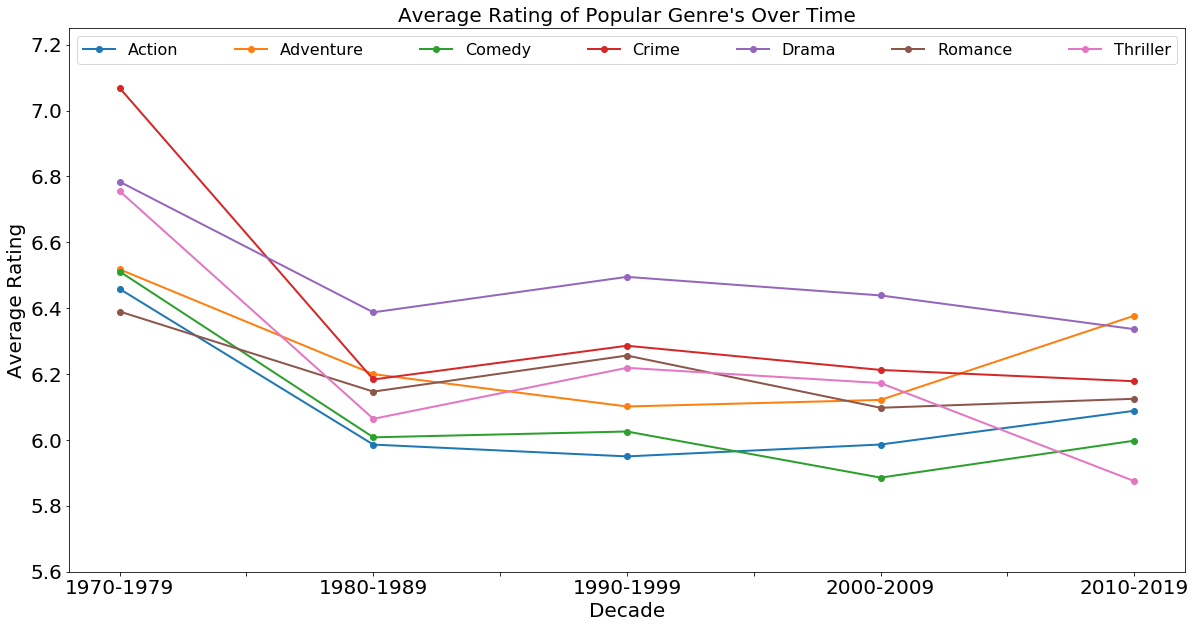

In [59]:
# Plot bar chart
ax = popular_ratings_df.plot(kind="line", figsize=(20,10), rot=0, legend=False, fontsize = 20, marker='o', linewidth=2)

# Format Chart
ax.legend(loc="best", mode = "expand", ncol = 10, fontsize=16)
ax.set_xlabel('Decade', fontsize=20)
ax.set_ylabel('Average Rating', fontsize=20)
plt.ylim(5.6, 7.25)
plt.title("Average Rating of Popular Genre's Over Time", fontsize=20)


# Output image
plt.savefig("images/Rating_by_Genre_Over_Time")

# Show Chart
plt.show()

## Popular Genres Over Time

In [60]:
# Group data by Decade/Genre and create data frame
genre_combined_groupby = narrowed_genre.groupby(['Decade', 'Genre']).count().unstack().dropna(how='any')
genre_combined = pd.DataFrame(genre_combined_groupby)
genre_combined=genre_combined['IMDB ID']


# Export file as csv
genre_combined.to_csv(r'output\genre_combined.csv', index=True)

# Study data files
genre_combined_path = "output/genre_combined.csv"

# Read the data and the study results
genre_combined_df = pd.read_csv(genre_combined_path, index_col=0)


# Turn rows into percentages
genre_combined_df[['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']] = genre_combined_df[['Action', 
                   'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']].apply(lambda x: x/x.sum(), axis=1).multiply(100)

# Display DataFrame
genre_combined_df

,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
Decade,,,,,,,,,,,,,,,,,,,,
1970-1979,7.17,6.82,0.52,1.57,15.21,6.64,23.95,2.80,1.22,0.87,2.27,1.92,1.40,3.67,6.99,3.32,2.97,6.64,2.27,1.75
1980-1989,8.82,5.73,0.74,1.80,18.53,8.14,21.04,1.67,3.19,0.93,4.70,1.87,0.80,2.90,7.88,2.83,1.32,5.60,1.13,0.39
1990-1999,7.77,5.10,0.87,1.99,19.02,8.76,23.85,3.29,2.51,0.85,2.58,1.33,0.30,2.72,8.80,2.17,1.12,5.99,0.66,0.32
2000-2009,8.04,5.97,1.83,2.27,17.81,7.62,22.53,2.99,2.73,1.01,2.91,1.47,0.60,3.59,9.49,1.91,1.36,5.20,0.53,0.15
2010-2019,10.31,6.45,2.14,3.82,15.89,5.86,23.30,2.00,2.41,1.29,3.96,1.29,0.30,3.07,6.92,2.47,1.05,6.81,0.40,0.30


In [61]:
genre_final = genre_combined_df[['Action', 'Adventure', 'Comedy', 'Crime', 'Drama', 'Romance', 'Thriller']]

# Export file as csv
genre_final.to_csv(r'output\genre_final.csv', index=True)

# Study data files
genre_final_path = "output/genre_final.csv"

# Read the data and the study results
genre_final_df = pd.read_csv(genre_final_path, index_col=0)

genre_final_df

,Action,Adventure,Comedy,Crime,Drama,Romance,Thriller
Decade,,,,,,,
1970-1979,7.17,6.82,15.21,6.64,23.95,6.99,6.64
1980-1989,8.82,5.73,18.53,8.14,21.04,7.88,5.60
1990-1999,7.77,5.10,19.02,8.76,23.85,8.80,5.99
2000-2009,8.04,5.97,17.81,7.62,22.53,9.49,5.20
2010-2019,10.31,6.45,15.89,5.86,23.30,6.92,6.81


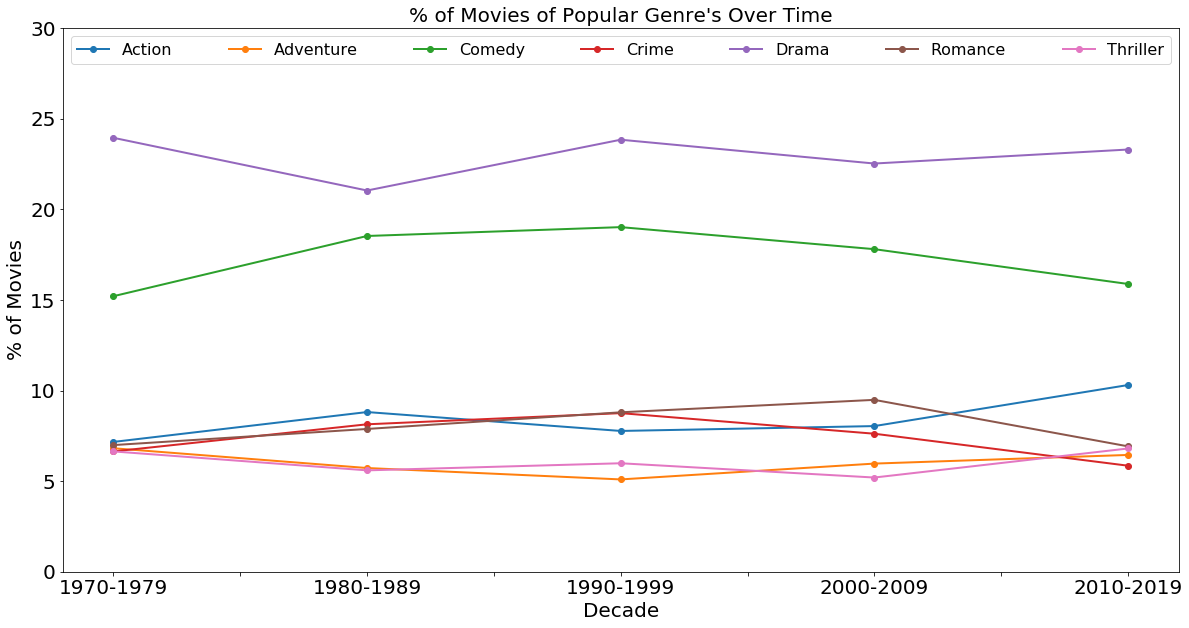

In [62]:
# Plot bar chart

ax = genre_final_df.plot(kind="line", figsize=(20,10), rot=0, legend=False, fontsize = 20, marker='o', linewidth=2)

# Format Chart
plt.legend(loc="upper center", mode = "expand", ncol = 10, fontsize=16)
plt.ylim(0.0, 30.0)
ax.set_xlabel('Decade', fontsize=20)
ax.set_ylabel('% of Movies', fontsize=20)
plt.title("% of Movies of Popular Genre's Over Time", fontsize=20)


# Output image
plt.savefig("images/Percentage_Genre_Over_Time")

# Show Chart
plt.show()

### Cleaned Data

In [63]:
# Display the data table for cleaned data
movie_clean.head()

,IMDB ID,Title,Year,Date Published,Genre,Duration,Country,Language,Director,Writer,Production Company,Actors,Avg Rating,# of Ratings,Lifetime_Gross,Lifetime Gross - Adjusted ($)
0,tt0012190,The Four Horsemen of the Apocalypse,1921,1923-01-08,"Drama, Romance, War",150,USA,None,Rex Ingram,"Vicente Blasco Ibáñez, June Mathis",Metro Pictures Corporation,"Pomeroy Cannon, Josef Swickard, Bridgetta Clar...",7.20,2935,"$9,183,673.00","$128,831,540.56"
1,tt0017136,Metropolis,1927,1927-02-06,"Drama, Sci-Fi",153,Germany,German,Fritz Lang,"Thea von Harbou, Thea von Harbou",Universum Film (UFA),"Alfred Abel, Gustav Fröhlich, Rudolf Klein-Rog...",8.30,148396,"$1,236,166.00","$17,839,651.48"
2,tt0017354,The Sea Beast,1926,1926-01-15,"Action, Adventure, Fantasy",136,USA,English,Millard Webb,"Herman Melville, Bess Meredyth",Warner Bros.,"John Barrymore, Dolores Costello, George O'Har...",6.50,126,"$814,000.00","$11,548,084.63"
3,tt0021749,City Lights,1931,1931-08-21,"Comedy, Drama, Romance",87,USA,English,Charles Chaplin,Charles Chaplin,Charles Chaplin Productions,"Virginia Cherrill, Florence Lee, Harry Myers, ...",8.50,152716,"$19,181.00","$316,873.91"
4,tt0027977,Modern Times,1936,1936-10-16,"Comedy, Drama, Family",87,USA,English,Charles Chaplin,Charles Chaplin,Charles Chaplin Productions,"Charles Chaplin, Paulette Goddard, Henry Bergm...",8.50,197969,"$163,577.00","$2,955,059.69"


In [64]:
# Cut movie data by decade
movie_clean["Decade"] = pd.cut(movie_clean["Year"], decade_bins, labels=decade_names, include_lowest=True)
movie_clean.head()

# Output file to csv
movie_clean.to_csv(r'output\movie_clean.csv', index=False)

In [65]:
# Group movie data by decade and count how many records
movie_decade = movie_clean.groupby('Decade')
movie_decade.count()

,IMDB ID,Title,Year,Date Published,Genre,Duration,Country,Language,Director,Writer,Production Company,Actors,Avg Rating,# of Ratings,Lifetime_Gross,Lifetime Gross - Adjusted ($)
Decade,,,,,,,,,,,,,,,,
1920-1929,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1930-1939,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
1940-1949,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
1950-1959,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22
1960-1969,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32
1970-1979,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240
1980-1989,1322,1322,1322,1322,1322,1322,1322,1322,1322,1322,1310,1322,1322,1322,1322,1322
1990-1999,1786,1786,1786,1786,1786,1786,1786,1784,1786,1785,1781,1786,1786,1786,1786,1786
2000-2009,2180,2180,2180,2180,2180,2180,2180,2176,2179,2175,2155,2179,2180,2180,2180,2180


In [66]:
# Create one DataFrame with data from 1980-2019 (decades with more than 500 records)


movie_narrowed = (movie_clean[(movie_clean['Decade'] == '1980-1989')
                                     | (movie_clean['Decade'] == '1990-1999') | (movie_clean['Decade'] == '1990-1999')
                                     | (movie_clean['Decade'] == '2000-2009') | (movie_clean['Decade'] == '2010-2019')])

movie_narrowed

,IMDB ID,Title,Year,Date Published,Genre,Duration,Country,Language,Director,Writer,Production Company,Actors,Avg Rating,# of Ratings,Lifetime_Gross,Lifetime Gross - Adjusted ($),Decade
275,tt0079285,Saturn 3,1980,1980-06-27,"Adventure, Horror, Sci-Fi",96,UK,English,"Stanley Donen, John Barry","Martin Amis, John Barry",ITC Films,"Farrah Fawcett, Kirk Douglas, Harvey Keitel",5.20,7754,"$9,000,000.00","$27,426,735.44",1980-1989
313,tt0080339,Airplane!,1980,1980-08-15,Comedy,88,USA,English,"Jim Abrahams, David Zucker","Jim Abrahams, David Zucker",Paramount Pictures,"Kareem Abdul-Jabbar, Lloyd Bridges, Peter Grav...",7.70,195157,"$83,453,539.00","$254,317,570.60",1980-1989
314,tt0080360,Altered States,1980,1980-12-25,"Horror, Sci-Fi, Thriller",102,USA,"English, Spanish",Ken Russell,"Paddy Chayefsky, Paddy Chayefsky",Warner Bros.,"William Hurt, Blair Brown, Bob Balaban, Charle...",6.90,30027,"$19,853,892.00","$60,503,049.25",1980-1989
315,tt0080365,American Gigolo,1980,1980-08-22,"Crime, Drama, Mystery",117,USA,"English, Swedish, French, German",Paul Schrader,Paul Schrader,Paramount Pictures,"Richard Gere, Lauren Hutton, Hector Elizondo, ...",6.20,19899,"$22,743,674.00","$69,309,414.41",1980-1989
316,tt0080377,Any Which Way You Can,1980,1980-12-19,"Action, Comedy",116,USA,English,Buddy Van Horn,"Stanford Sherman, Jeremy Joe Kronsberg",The Malpaso Company,"Clint Eastwood, Sondra Locke, Geoffrey Lewis, ...",6.10,16295,"$70,687,344.00","$215,413,675.85",1980-1989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7729,tt8235296,The Trump Prophecy,2018,2018-10-02,Drama,120,USA,English,Stephan Schultze,"Mary Colbert, Rick Eldridge",ReelWorks Studios,"Chris Nelson, Paulette Todd, Karen Boles, Don ...",3.00,1669,"$671,198.00","$671,198.00",2010-2019
7730,tt8264546,1991,2018,2018-07-27,Comedy,141,Canada,"French, Italian, English, German, Greek, Spanish",Ricardo Trogi,Ricardo Trogi,NaN,"Sandrine Bisson, Jean-Carl Boucher, Mamoudou C...",7.10,501,"$2,342,264.00","$2,342,264.00",2010-2019
7735,tt8427036,Helicopter Eela,2018,2018-10-12,Drama,135,India,Hindi,Pradeep Sarkar,"Mitesh Shah, Anand Gandhi",Ajay Devgn Ffilms,"Kajol, Riddhi Sen, Tota Roy Chowdhury, Neha Dh...",5.50,800,"$71,971.00","$71,971.00",2010-2019
7739,tt8581198,Jane and Emma,2018,2018-10-12,Drama,90,USA,English,Chantelle Squires,Melissa Leilani Larson,NaN,"Danielle Deadwyler, Emily Goss, Brad Schmidt, ...",5.90,115,"$380,030.00","$380,030.00",2010-2019


In [67]:
# Copy data frame
movie_narrowed_df = movie_narrowed.copy()

# Change Date Published to datetime
movie_narrowed_df['Date Published']= pd.to_datetime(movie_narrowed_df['Date Published']) 

movie_narrowed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7352 entries, 275 to 7745
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   IMDB ID                        7352 non-null   object        
 1   Title                          7352 non-null   object        
 2   Year                           7352 non-null   int64         
 3   Date Published                 7352 non-null   datetime64[ns]
 4   Genre                          7352 non-null   object        
 5   Duration                       7352 non-null   int64         
 6   Country                        7352 non-null   object        
 7   Language                       7340 non-null   object        
 8   Director                       7351 non-null   object        
 9   Writer                         7340 non-null   object        
 10  Production Company             7289 non-null   object        
 11  Actors         

In [68]:
# Change date published to season
# stackoverflow.com/questions/60285557/extract-seasons-from-datetime-pandas

movie_narrowed_df['Season'] = (movie_narrowed_df['Date Published'].dt.month%12 + 3)//3

seasons = {
             1: 'Winter',
             2: 'Spring',
             3: 'Summer',
             4: 'Autumn'
}

movie_narrowed_df['Season'] = movie_narrowed_df['Season'].map(seasons)
movie_narrowed_df

,IMDB ID,Title,Year,Date Published,Genre,Duration,Country,Language,Director,Writer,Production Company,Actors,Avg Rating,# of Ratings,Lifetime_Gross,Lifetime Gross - Adjusted ($),Decade,Season
275,tt0079285,Saturn 3,1980,1980-06-27,"Adventure, Horror, Sci-Fi",96,UK,English,"Stanley Donen, John Barry","Martin Amis, John Barry",ITC Films,"Farrah Fawcett, Kirk Douglas, Harvey Keitel",5.20,7754,"$9,000,000.00","$27,426,735.44",1980-1989,Summer
313,tt0080339,Airplane!,1980,1980-08-15,Comedy,88,USA,English,"Jim Abrahams, David Zucker","Jim Abrahams, David Zucker",Paramount Pictures,"Kareem Abdul-Jabbar, Lloyd Bridges, Peter Grav...",7.70,195157,"$83,453,539.00","$254,317,570.60",1980-1989,Summer
314,tt0080360,Altered States,1980,1980-12-25,"Horror, Sci-Fi, Thriller",102,USA,"English, Spanish",Ken Russell,"Paddy Chayefsky, Paddy Chayefsky",Warner Bros.,"William Hurt, Blair Brown, Bob Balaban, Charle...",6.90,30027,"$19,853,892.00","$60,503,049.25",1980-1989,Winter
315,tt0080365,American Gigolo,1980,1980-08-22,"Crime, Drama, Mystery",117,USA,"English, Swedish, French, German",Paul Schrader,Paul Schrader,Paramount Pictures,"Richard Gere, Lauren Hutton, Hector Elizondo, ...",6.20,19899,"$22,743,674.00","$69,309,414.41",1980-1989,Summer
316,tt0080377,Any Which Way You Can,1980,1980-12-19,"Action, Comedy",116,USA,English,Buddy Van Horn,"Stanford Sherman, Jeremy Joe Kronsberg",The Malpaso Company,"Clint Eastwood, Sondra Locke, Geoffrey Lewis, ...",6.10,16295,"$70,687,344.00","$215,413,675.85",1980-1989,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7729,tt8235296,The Trump Prophecy,2018,2018-10-02,Drama,120,USA,English,Stephan Schultze,"Mary Colbert, Rick Eldridge",ReelWorks Studios,"Chris Nelson, Paulette Todd, Karen Boles, Don ...",3.00,1669,"$671,198.00","$671,198.00",2010-2019,Autumn
7730,tt8264546,1991,2018,2018-07-27,Comedy,141,Canada,"French, Italian, English, German, Greek, Spanish",Ricardo Trogi,Ricardo Trogi,NaN,"Sandrine Bisson, Jean-Carl Boucher, Mamoudou C...",7.10,501,"$2,342,264.00","$2,342,264.00",2010-2019,Summer
7735,tt8427036,Helicopter Eela,2018,2018-10-12,Drama,135,India,Hindi,Pradeep Sarkar,"Mitesh Shah, Anand Gandhi",Ajay Devgn Ffilms,"Kajol, Riddhi Sen, Tota Roy Chowdhury, Neha Dh...",5.50,800,"$71,971.00","$71,971.00",2010-2019,Autumn
7739,tt8581198,Jane and Emma,2018,2018-10-12,Drama,90,USA,English,Chantelle Squires,Melissa Leilani Larson,NaN,"Danielle Deadwyler, Emily Goss, Brad Schmidt, ...",5.90,115,"$380,030.00","$380,030.00",2010-2019,Autumn


### Average Movie Ratings By Season

In [69]:
# Group data by Season and Decade.
season_rating_groupby = movie_narrowed_df.groupby(['Season', 'Decade'])['Avg Rating'].mean().unstack().dropna(how='all', axis=1)

# Export file as csv
season_rating_groupby.to_csv(r'output\season_ratings.csv', index=True)

# Study data files
season_ratings_path = "output/season_ratings.csv"

# Read the data and the study results
season_ratings_df = pd.read_csv(season_ratings_path, index_col=0)
season_ratings_df


,1980-1989,1990-1999,2000-2009,2010-2019
Season,,,,
Autumn,6.17,6.31,6.18,6.16
Spring,6.10,6.22,6.08,6.00
Summer,6.07,6.11,5.97,6.06
Winter,6.29,6.23,6.29,6.26


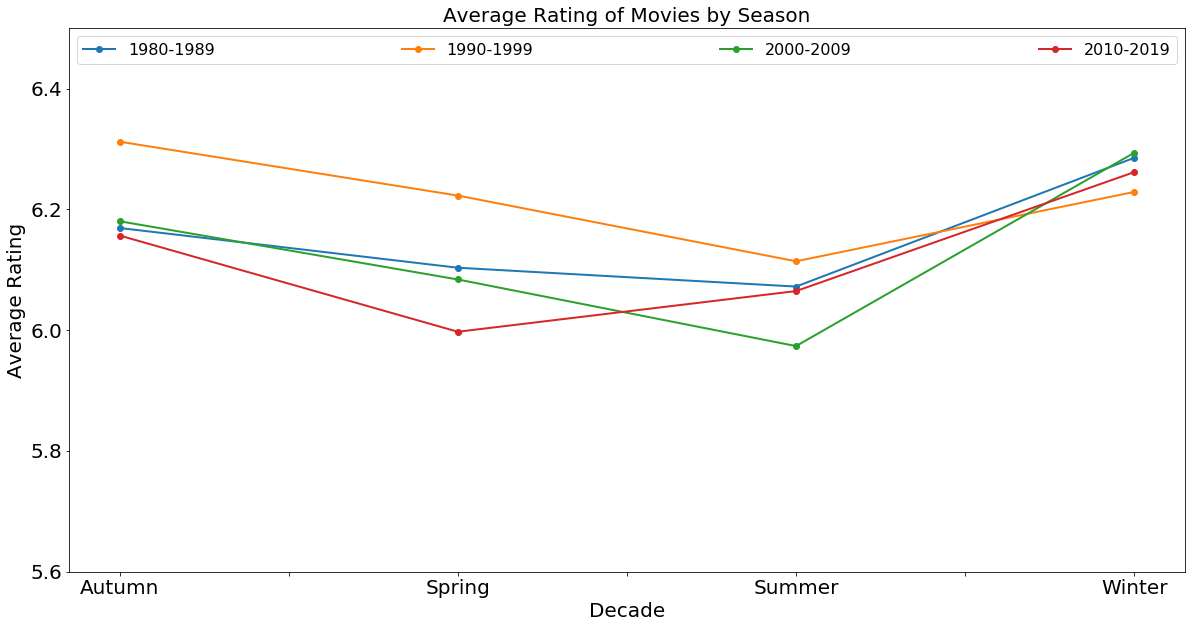

In [72]:
# Plot bar chart
ax = season_ratings_df.plot(kind="line", figsize=(20,10), rot=0, legend=False, fontsize = 20, marker='o', linewidth=2)

# Format Chart
ax.legend(loc="upper center", mode = "expand", ncol = 10, fontsize=16)
ax.set_xlabel('Decade', fontsize=20)
ax.set_ylabel('Average Rating', fontsize=20)
plt.ylim(5.6, 6.5)
plt.title("Average Rating of Movies by Season", fontsize=20)


# Output image
plt.savefig("images/Rating_by_Season")

# Show Chart
plt.show()

### Average Revenue By Season

In [73]:
# Change Lifetime Adjusted Gross to float variable
movie_narrowed_df['Lifetime Gross - Adjusted ($)']=(movie_narrowed_df['Lifetime Gross - Adjusted ($)'].replace( '[\$,)]','', regex=True )
                   .replace( '[(]','-',   regex=True ).astype(float))

# Verify types
movie_narrowed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7352 entries, 275 to 7745
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   IMDB ID                        7352 non-null   object        
 1   Title                          7352 non-null   object        
 2   Year                           7352 non-null   int64         
 3   Date Published                 7352 non-null   datetime64[ns]
 4   Genre                          7352 non-null   object        
 5   Duration                       7352 non-null   int64         
 6   Country                        7352 non-null   object        
 7   Language                       7340 non-null   object        
 8   Director                       7351 non-null   object        
 9   Writer                         7340 non-null   object        
 10  Production Company             7289 non-null   object        
 11  Actors         

In [74]:
# Group data by Season and Decade.
season_revenue_groupby = movie_narrowed_df.groupby(['Season', 'Decade'])['Lifetime Gross - Adjusted ($)'].mean().unstack().dropna(how='all', axis=1)

# Export file as csv
season_revenue_groupby.to_csv(r'output\season_revenue.csv', index=True)

# Study data files
season_revenue_path = "output/season_revenue.csv"

# Read the data and the study results
season_revenue_df = pd.read_csv(season_revenue_path, index_col=0)
season_revenue_df


,1980-1989,1990-1999,2000-2009,2010-2019
Season,,,,
Autumn,"35,540,546.38","43,122,136.06","40,510,734.94","27,964,508.72"
Spring,"38,764,799.78","39,750,616.87","42,435,510.74","40,002,573.74"
Summer,"56,341,434.01","54,273,214.46","56,713,194.41","48,916,794.77"
Winter,"56,963,857.04","49,061,710.37","51,738,237.39","42,890,726.08"


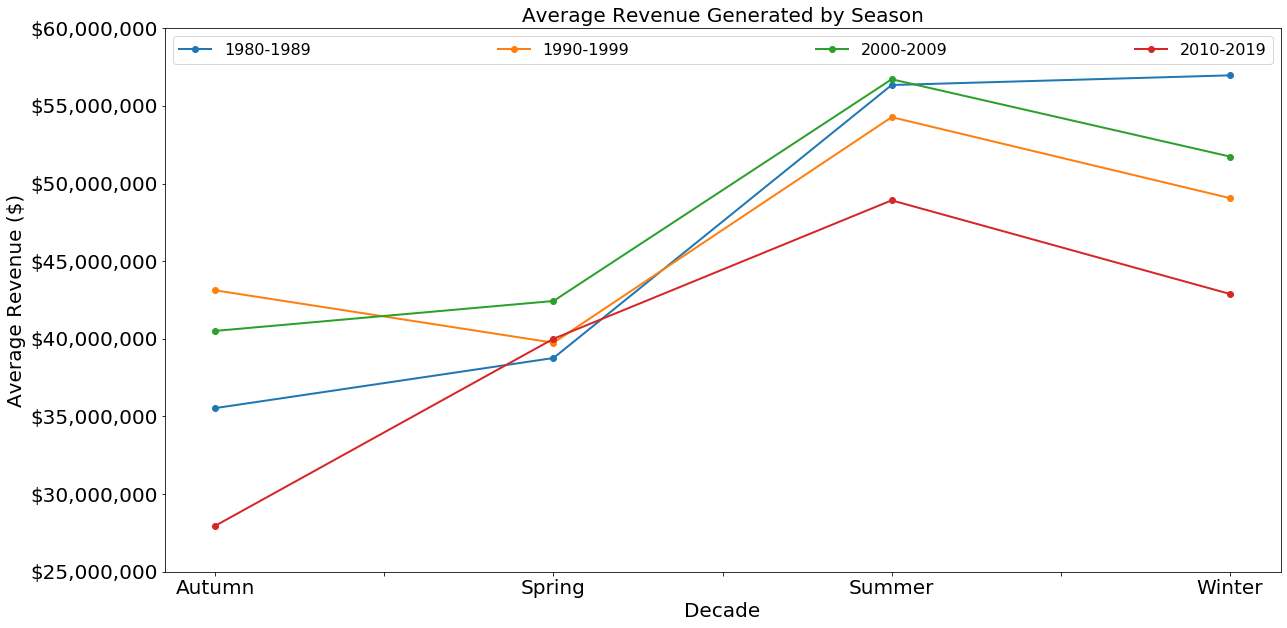

In [76]:
# Plot bar chart
ax = season_revenue_df.plot(kind="line", figsize=(20,10), rot=0, legend=False, fontsize = 20, marker='o', linewidth=2)

# Format Chart
# Currency labels: stackoverflow.com/questions/38152356/matplotlib-dollar-sign-with-thousands-comma-tick-labels
ax.legend(loc="upper center", mode = "expand", ncol = 10, fontsize=16)
ax.set_xlabel('Decade', fontsize=20)
ax.set_ylabel('Average Revenue ($)', fontsize=20)
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
plt.ylim(25000000, 60000000)

plt.title("Average Revenue Generated by Season", fontsize=20)


# Output image
plt.savefig("images/Revenue_by_Season")

# Show Chart
plt.show()

### Average Duration By Season

In [77]:
# Group data by Season and Decade.
season_duration_groupby = movie_narrowed_df.groupby(['Season', 'Decade'])['Duration'].mean().unstack().dropna(how='all', axis=1)

# Export file as csv
season_duration_groupby.to_csv(r'output\season_duration.csv', index=True)

# Study data files
season_duration_path = "output/season_duration.csv"

# Read the data and the study results
season_duration_df = pd.read_csv(season_duration_path, index_col=0)
season_duration_df

,1980-1989,1990-1999,2000-2009,2010-2019
Season,,,,
Autumn,103.37,106.95,107.25,107.52
Spring,103.70,107.06,106.21,106.82
Summer,102.76,104.61,106.65,107.56
Winter,105.29,107.42,109.90,112.20


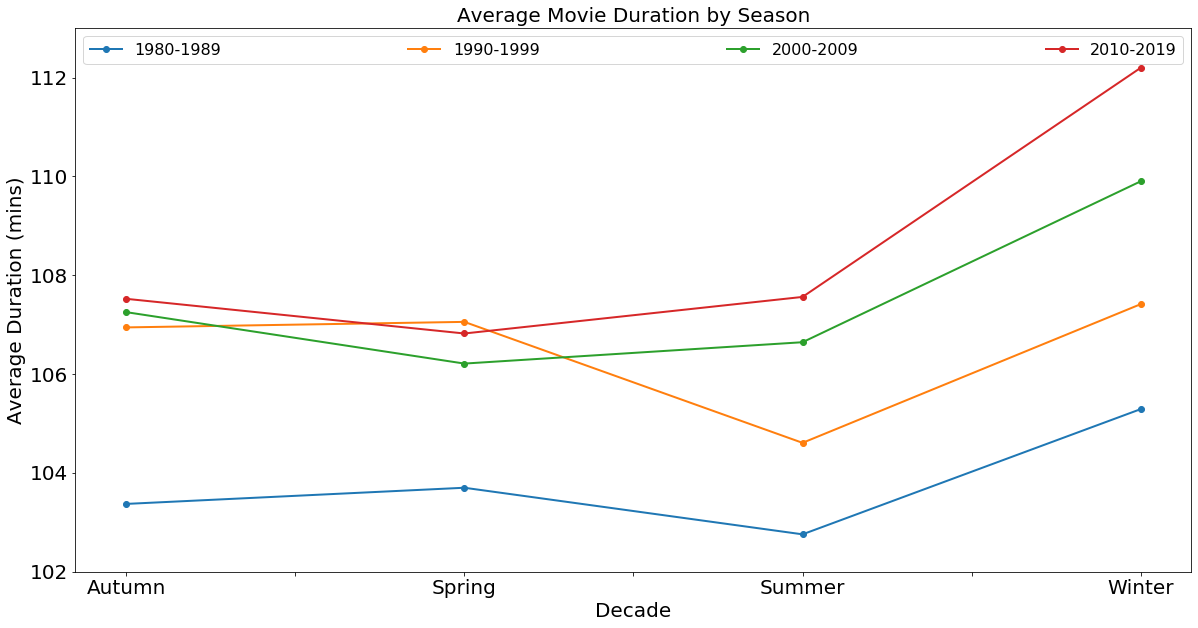

In [79]:
# Plot bar chart
ax = season_duration_df.plot(kind="line", figsize=(20,10), rot=0, legend=False, fontsize = 20, marker='o', linewidth=2)

# Format Chart
ax.legend(loc="upper center", mode = "expand", ncol = 10, fontsize=16)
ax.set_xlabel('Decade', fontsize=20)
ax.set_ylabel('Average Duration (mins)', fontsize=20)
plt.ylim(102, 113)
plt.title("Average Movie Duration by Season", fontsize=20)


# Output image
plt.savefig("images/Duration_by_Season")

# Show Chart
plt.show()

### Adjust Movie Data by Year

In [80]:
# Group data by Season and Decade.
movie_revenue_groupby = movie_narrowed_df.groupby('Decade')['Lifetime Gross - Adjusted ($)'].mean().dropna(how='all')

# Export file as csv
movie_revenue_groupby.to_csv(r'output\movie_revenue.csv', index=True)

# Study data files
movie_revenue_path = "output/movie_revenue.csv"

# Read the data and the study results
movie_revenue_df = pd.read_csv(movie_revenue_path, index_col=0)
movie_revenue_df


,Lifetime Gross - Adjusted ($)
Decade,
1980-1989,"46,242,815.53"
1990-1999,"45,964,756.72"
2000-2009,"47,442,482.84"
2010-2019,"39,210,890.86"


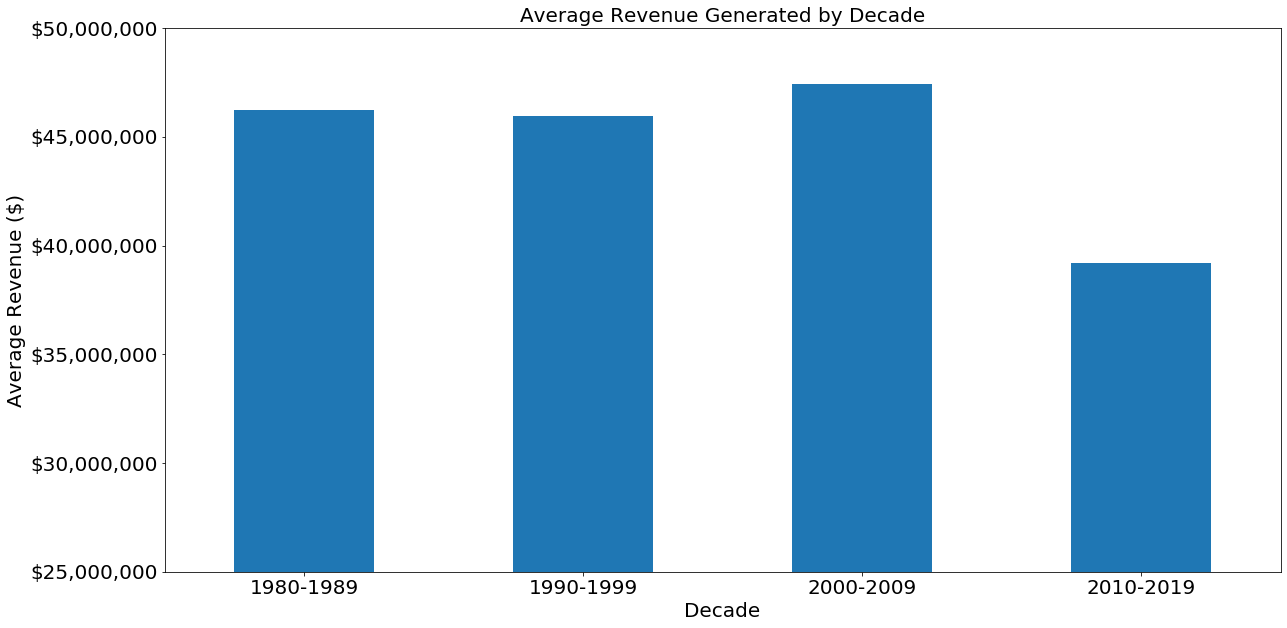

In [81]:
# Plot bar chart
ax = movie_revenue_df.plot(kind="bar", figsize=(20,10), rot=0, legend=False, fontsize = 20)

# Format Chart
# Currency labels: stackoverflow.com/questions/38152356/matplotlib-dollar-sign-with-thousands-comma-tick-labels
ax.set_xlabel('Decade', fontsize=20)
ax.set_ylabel('Average Revenue ($)', fontsize=20)
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
plt.ylim(25000000, 50000000)

plt.title("Average Revenue Generated by Decade", fontsize=20)


# Output image
plt.savefig("images/Revenue_by_Decade")

# Show Chart
plt.show()